$$\text{\Huge{Hockey}}$$
**Dataset**: [NHL Game Data](https://www.kaggle.com/datasets/martinellis/nhl-game-data)

$$\text{\Huge{Setup}}$$

In [1]:
import gc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import sklearn as sk
import warnings

from IPython.display import display
from sklearn import cluster
from textwrap import dedent

In [2]:
plt.style.use('science')

plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlepad'] = 15 
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['legend.title_fontsize'] = 16
plt.rcParams['legend.fontsize'] = 12

$$\text{\Huge{Data understanding}}$$

I am using a NHL dataset, which is pulled from the official/undocumented NHL API, and divided into separate .csv files. The entire dataset is a combined 1.55 GB in disk space. I am attempting to minimize the RAM usage by declaring the datatype of each column, as it would often exceed Google Colab's resources on the free version. By default, pandas will make a numeric column a 64-bit integer or float, which is much more than required. I am also excluding columns from the dataset, which do not contribute to the analysis of the data. (i.e., the **description** column from the **game_plays.csv** file)

I am using 6/13 .csv file(s) from the dataset in this project including:


1.   game_plays.csv
2.   game_goals.csv
3.   game_plays_players.csv
4.   game_skater_stats.csv
5.   team_info.csv
6.   player_info.csv



Use pandas datatypes, because they're nullable, whereas numpy's are not.

In [3]:
# Plays

dtype = {
    'play_id': 'object',
    'game_id': 'object',
    'team_id_for': 'Int8',  
    'team_id_against': 'Int8',  
    'event': 'category',
    'secondaryType': 'category',
    'x': 'Int8',  
    'y': 'Int8',  
    'period': 'Int8',  
    'periodType': 'category',
    'periodTime': 'Int16',  
    'periodTimeRemaining': 'Int16',  
    'dateTime': 'datetime64[ns]',
    'goals_away': 'Int8',  
    'goals_home': 'Int8',  
    'st_x': 'Int8',  
    'st_y': 'Int8', 
}

usecols = [
    'play_id',
    'game_id',
    'team_id_for',
    'team_id_against',
    'event',
    'secondaryType',
    'x',
    'y',
    'period',
    'periodType',
    'periodTime',
    'periodTimeRemaining',
    'dateTime',
    'goals_away',
    'goals_home',
    'st_x',
    'st_y',
]

df_play = pd.read_csv(
    'dataset/game_plays.csv',
    engine='python',
    usecols=usecols,
    dtype=dtype
)

gc.collect()

29

In [4]:
# Goals

dtype = {
    'play_id': 'object',
    'strength': 'category',
    'gameWinningGoal': 'boolean',
    'emptyNet': 'boolean'  
}

usecols = [
    'play_id',
    'strength',
    'gameWinningGoal',
    'emptyNet'
]

df_goal = pd.read_csv(
    'dataset/game_goals.csv',
    engine='python',
    usecols=usecols,
    dtype=dtype
)

gc.collect()

29

In [5]:
# Plays by Players

dtype = {
    'play_id': 'object',
    'game_id': 'object',
    'player_id': 'object',
    'playerType': 'category'
}

usecols = [
    'play_id',
    'game_id',
    'player_id',
    'playerType'
]

df_pbp = pd.read_csv(
    'dataset/game_plays_players.csv',
    engine='python',
    usecols=usecols,
    dtype=dtype
)

gc.collect()

29

In [6]:
# Skaters

dtype = {
    'game_id': 'object',
    'player_id': 'object',
    'team_id': 'Int8',
    'timeOnIce': 'Int16',
    'assists': 'Int16',
    'goals': 'Int16',
    'shots': 'Int16',
    'hits': 'Int16',
    'powerPlayGoals': 'Int16',
    'powerPlayAssists': 'Int16',
    'penaltyMinutes': 'Int16',
    'faceOffWins': 'Int16',
    'faceoffTaken': 'Int16',
    'takeaways': 'Int16',
    'giveaways': 'Int16',
    'shortHandedGoals': 'Int16',
    'shortHandedAssists': 'Int16',
    'blocked': 'Int16',
    'plusMinus': 'Int16',
    'evenTimeOnIce': 'Int16',
    'shortHandedTimeOnIce': 'Int16',
    'powerPlayTimeOnIce': 'Int16'
}

usecols = [
    'game_id',
    'player_id',
    'team_id',
    'timeOnIce',
    'assists',
    'goals',
    'shots',
    'hits',
    'powerPlayGoals',
    'powerPlayAssists',
    'penaltyMinutes',
    'faceOffWins',
    'faceoffTaken',
    'takeaways',
    'giveaways',
    'shortHandedGoals',
    'shortHandedAssists',
    'blocked',
    'plusMinus',
    'evenTimeOnIce',
    'shortHandedTimeOnIce',
    'powerPlayTimeOnIce'
]

df_skater = pd.read_csv(
    'dataset/game_skater_stats.csv',
    engine='python',
    usecols=usecols,
    dtype=dtype
)

gc.collect()

29

In [7]:
# Teams

dtype = {
    'team_id': 'Int8',
    'franchiseId': 'Int8', 
    'shortName': 'category',
    'teamName': 'category',
    'abbreviation': 'category'
}

usecols = [
    'team_id',
    'franchiseId',
    'shortName',
    'teamName',
    'abbreviation'
]

df_team = pd.read_csv(
    'dataset/team_info.csv',
    engine='python',
    usecols=usecols,
    dtype=dtype
)

gc.collect()

29

In [8]:
# Players

dtype = {
    'player_id': 'object',
    'firstName': 'object',
    'lastName': 'object',
    'nationality': 'category',
    'primaryPosition': 'category',
    'height': 'object',
    'height_cm': 'float16',
    'weight': 'Int16',
    'shootsCatches': 'category'
}

usecols = [
    'player_id',
    'firstName',
    'lastName',
    'nationality',
    'primaryPosition',
    'height',
    'height_cm',
    'weight',
    'shootsCatches'
]

df_player = pd.read_csv(
    'dataset/player_info.csv',
    engine='python',
    usecols=usecols,
    dtype=dtype
)

gc.collect()

29

In [9]:
print(df_play.dtypes)
print(df_goal.dtypes)
print(df_pbp.dtypes)
print(df_skater.dtypes)
print(df_team.dtypes)
print(df_player.dtypes)

play_id                        object
game_id                        object
team_id_for                      Int8
team_id_against                  Int8
event                        category
secondaryType                category
x                                Int8
y                                Int8
period                           Int8
periodType                   category
periodTime                      Int16
periodTimeRemaining             Int16
dateTime               datetime64[ns]
goals_away                       Int8
goals_home                       Int8
st_x                             Int8
st_y                             Int8
dtype: object
play_id              object
strength           category
gameWinningGoal     boolean
emptyNet            boolean
dtype: object
play_id         object
game_id         object
player_id       object
playerType    category
dtype: object
game_id                 object
player_id               object
team_id                   Int8
timeOnIce      

**Sorting and cleaning**

In [10]:
# Filter and remove duplicate information
df_play = df_play.drop_duplicates(subset=['play_id'])
df_goal = df_goal.drop_duplicates(subset=['play_id'])
df_pbp = df_pbp.drop_duplicates(subset=['play_id'])
df_skater = df_skater.drop_duplicates()
df_player = df_player.drop_duplicates(subset=['player_id'])

# The "master" dataframe
df_master = df_play.merge(
    df_goal,
    on=['play_id'],
    how='outer'
)

df_team_for = df_team.copy().add_suffix('_for')
df_team_against = df_team.copy().add_suffix('_against')

# Merge team information into the dataframe
df_master = df_master.merge(
    df_team_for,
    left_on=['team_id_for'],
    right_on=['team_id_for'],
    how='outer'
)

df_master = df_master.merge(
    df_team_against,
    left_on=['team_id_against'],
    right_on=['team_id_against'],
    how='outer'
)

# Merge plays by players into the dataframe
df_master = df_master.merge(
    df_pbp,
    left_on=['play_id'],
    right_on=['play_id'],
    how='inner'
)

# Merge player information into the dataframe
df_master = df_master.merge(
    df_player,
    left_on=['player_id'],
    right_on=['player_id'],
    how='inner'
)

# Create a new column to hold the year
df_master['date'] = (
    pd
    .to_datetime(df_master['dateTime'])
    .dt
    .year
    .astype(
        pd.Int16Dtype()
    )
)

# Filter the dataframe to keep the goals/scorers
dataframe = df_master[df_master.event == 'Goal']
dataframe = df_master[df_master.playerType == 'Scorer']

# Remove empty net goals
dataframe = dataframe[dataframe.emptyNet == False]

# These are undocumented team(s), so drop them
undocumented = [87, 88, 89, 90]

condition = (
    dataframe['team_id_for'].isin(undocumented) |
    dataframe['team_id_against'].isin(undocumented)
)

# The 2019/2020 season contain undocumented team(s)
dataframe = dataframe[~condition]

# Create a dataframe to determine the percentage of shot types that result in a goal
df_shot = dataframe[dataframe.secondaryType.isnull() == False]

df_shot = (
    df_shot
    .secondaryType
    .cat
    .remove_unused_categories()
    .value_counts()
    .rename_axis('type')
    .reset_index(name='count')
)

In [11]:
columns = [
    'player_id',
    'assists',
    'goals',
    'shots',
    'hits',
    'powerPlayGoals',
    'powerPlayAssists',
    'faceOffWins',
    'faceoffTaken',
    'takeaways',
    'giveaways',
    'shortHandedGoals',
    'shortHandedAssists',
    'blocked',
]

# Ensure that these columns are in the DataFrame and handle any potential NaN values by filling with zero.
df_skater_filtered = df_skater[columns].fillna(0)

# Group by 'player_id' and sum the non-null values for all other columns.
df_statistics = df_skater_filtered.groupby('player_id').sum().reset_index()

# Merge with df_player to get additional player details.
df_statistics = df_player.merge(
    df_statistics,
    on='player_id',
    how='inner'
)

# Create a new column to hold the player's full name.
df_statistics['fullName'] = df_statistics['firstName'] + ' ' + df_statistics['lastName']

df_statistics.head()

player_id firstName      lastName nationality primaryPosition  height  \
0   8466148    Marian         Hossa         SVK              RW   6' 1"   
1   8465058    Michal      Rozsival         CZE               D   6' 1"   
2   8476906    Shayne  Gostisbehere         USA               D  5' 11"   
3   8466285     Brian      Campbell         CAN               D  5' 10"   
4   8470607     Brent      Seabrook         CAN               D   6' 3"   

   height_cm  weight shootsCatches  assists  ...  powerPlayGoals  \
0    185.375     207             L      606  ...             143   
1    185.375     210             R      234  ...              27   
2    180.375     180             L      151  ...              24   
3    177.750     192             L      420  ...              33   
4    190.500     220             R      382  ...              42   

   powerPlayAssists  faceOffWins  faceoffTaken  takeaways  giveaways  \
0               227           67           188        506        205   
1                66            2             9        106        181   
2                75            1             1        107        272   
3               173            0             3        169        327   
4               127            1             6        244        737   

   shortHandedGoals  shortHandedAssists  blocked             fullName  
0                36                  14      236         Marian Hossa  
1                 2                   8      540      Michal Rozsival  
2                 0                   0      436  Shayne Gostisbehere  
3                 1                   4      681       Brian Campbell  
4                 2                  11     1594       Brent Seabrook  

[5 rows x 23 columns]

In [12]:
print(f"df_play: {df_play.shape}")
print(f"df_goal: {df_goal.shape}")
print(f"df_pbp: {df_pbp.shape}")
print(f"df_player: {df_player.shape}")
print(f"df_team: {df_team.shape}")

print(f"df_master: {df_master.shape}")
print(f"df_team_for: {df_team_for.shape}")
print(f"df_team_against: {df_team_against.shape}")
print(f"dataframe: {dataframe.shape}")
print(f"df_statistics: {df_statistics.shape}")
print(f"df_shot: {df_shot.shape}")

df_play: (4217063, 17)
df_goal: (133345, 4)
df_pbp: (3440757, 4)
df_player: (3925, 9)
df_team: (33, 5)
df_master: (3440746, 40)
df_team_for: (33, 5)
df_team_against: (33, 5)
dataframe: (123627, 40)
df_statistics: (3353, 23)
df_shot: (7, 2)


$$\text{\Huge{Summary statistics}}$$

The numerical summary statistics were interesting, but I wasn't as interested in those statistics as I was in the categorical data. However, I found the height and weight of the players fascinating. There were players as short as 5'3" and as tall as 6'8". There were players as light as 154 pounds and as heavy as 265 pounds. The summary statistics would have been more helpful if I investigated a single season. However, most of my project focuses on the bigger picture from 2000-2020.

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    output = dataframe.describe()
    display(output)

team_id_for  team_id_against         x          y    period  \
count     123627.0         123627.0   65592.0    65595.0  123627.0   
mean     16.512121        16.561787  0.408236   0.078924  2.058401   
min            1.0              1.0     -99.0      -40.0       1.0   
25%            8.0              8.0     -74.0       -6.0       1.0   
50%           16.0             16.0      29.0        0.0       2.0   
75%           23.0             23.0      75.0        6.0       3.0   
max           54.0             54.0      98.0       42.0       8.0   
std      10.688501          10.7603  71.57117  12.172407  0.841712   

       periodTime  periodTimeRemaining                       dateTime  \
count    123627.0              65607.0                         123627   
mean   596.900604           584.438749  2011-01-01 07:17:41.011203328   
min           0.0                  1.0            2000-10-05 00:00:00   
25%         295.0                278.0            2006-03-30 02:30:00   
50%         590.0                584.0            2011-01-23 19:28:42   
75%         894.0                882.0            2016-02-15 22:24:08   
max        1200.0               1200.0            2020-09-29 02:24:06   
std    344.841234            345.30788                            NaN   

       goals_away  goals_home       st_x       st_y  franchiseId_for  \
count    123627.0    123627.0    65592.0    65592.0         123627.0   
mean     1.723701    1.921473  69.932294  -0.292993        21.806215   
min           0.0         0.0      -97.0      -42.0              1.0   
25%           1.0         1.0       63.0       -7.0             15.0   
50%           1.0         2.0       75.0        0.0             22.0   
75%           3.0         3.0       80.0        6.0             30.0   
max          11.0        12.0       99.0       42.0             38.0   
std      1.392948    1.480736  15.231508  12.169087         9.710056   

       franchiseId_against   height_cm      weight         date  
count             123627.0  123627.000    123627.0     123627.0  
mean             22.020521         NaN  202.558867  2010.527247  
min                    1.0     162.500       154.0       2000.0  
25%                   15.0     182.875       191.0       2006.0  
50%                   23.0     185.375       201.0       2011.0  
75%                   30.0     188.000       214.0       2016.0  
max                   38.0     205.750       265.0       2020.0  
std               9.709935       0.000   15.581887     5.849522

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    output = df_statistics.describe()
    display(output)

height_cm      weight     assists      goals       shots        hits  \
count  3353.000000      3353.0      3353.0     3353.0      3353.0      3353.0   
mean           inf  201.517149   66.511482  39.073367  421.322398  177.780197   
std       5.355469   15.794259  109.901344  70.220973  632.250199   331.43587   
min     162.500000       154.0         0.0        0.0         0.0         0.0   
25%     182.875000       190.0         2.0        1.0        19.0         0.0   
50%     185.375000       200.0        17.0        8.0       137.0        15.0   
75%     188.000000       211.0        84.0       43.0       581.0       204.0   
max     205.750000       265.0      1075.0      755.0      5982.0      3336.0   

       powerPlayGoals  powerPlayAssists  faceOffWins  faceoffTaken  \
count          3353.0            3353.0       3353.0        3353.0   
mean         9.571429         18.185207   427.116016    854.218312   
std         21.716641         40.692338  1334.885128    2585.87424   
min               0.0               0.0          0.0           0.0   
25%               0.0               0.0          0.0           0.0   
50%               1.0               1.0          3.0           8.0   
75%               7.0              14.0         98.0         234.0   
max             280.0             403.0      13997.0       24421.0   

        takeaways   giveaways  shortHandedGoals  shortHandedAssists  \
count      3353.0      3353.0            3353.0              3353.0   
mean    52.404712   62.661497          1.252013            1.324187   
std    100.301901  121.462199          3.046774            2.627796   
min           0.0         0.0               0.0                 0.0   
25%           0.0         0.0               0.0                 0.0   
50%           3.0         3.0               0.0                 0.0   
75%          53.0        66.0               1.0                 1.0   
max         753.0       986.0              36.0                26.0   

          blocked  
count      3353.0  
mean   108.616463  
std    227.760947  
min           0.0  
25%           0.0  
50%           6.0  
75%         114.0  
max        1858.0

The categorical data was far more interesting for answering some of the questions I posed. I am surprised at the types of shots that resulted in goals, because from my experience of watching hockey, tip-ins, deflections and wrap-arounds goals seem more prevalent than what the statistics would suggest.

In [15]:
alphabetic = [
    'event',
    'secondaryType',
    'periodType',
    'strength',
    'gameWinningGoal',
]

for column in alphabetic:
    count = dataframe[column].value_counts()

    percent = (
        dataframe[column].
        value_counts(normalize=True).
        mul(100).
        round(2).
        astype(str) + '%'
    )

    print(column)

    for (ci, cv, pv) in zip(count.index, count.values, percent.values):
        if int(cv) > 0:
            ci = str(ci).title()
            print(f"{ci}: {cv}, {pv}")

    print('\n')

event
Goal: 123627, 100.0%


secondaryType
Wrist Shot: 31947, 48.72%
Snap Shot: 9915, 15.12%
Slap Shot: 8108, 12.36%
Tip-In: 6504, 9.92%
Backhand: 6394, 9.75%
Deflected: 2182, 3.33%
Wrap-Around: 528, 0.81%


periodType
Regular: 120809, 97.72%
Overtime: 2818, 2.28%


strength
Even: 88622, 71.68%
Power Play: 31255, 25.28%
Short Handed: 3750, 3.03%


gameWinningGoal
False: 103070, 83.37%
True: 20557, 16.63%




$$\text{\Huge{Visualize the data}}$$

**How many goals are scored per year?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Continuous**: Year

        *   **Discrete**: Goal


2. Graphical component -- what kinds of plot can you use?
    * Countplot
    * Barplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Year
    * **y-axis**: Goals


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting how many goals are scored per year from 2000-2020.
    * It would be ideal to show the exact amount of goals scored per year.
    * A countplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * The graph itself is not misleading, as it is simple to interpret.
    * The NHL API is inconsistent (including this dataset), and does not record everything (or at least it is not digitized as well as it could be).

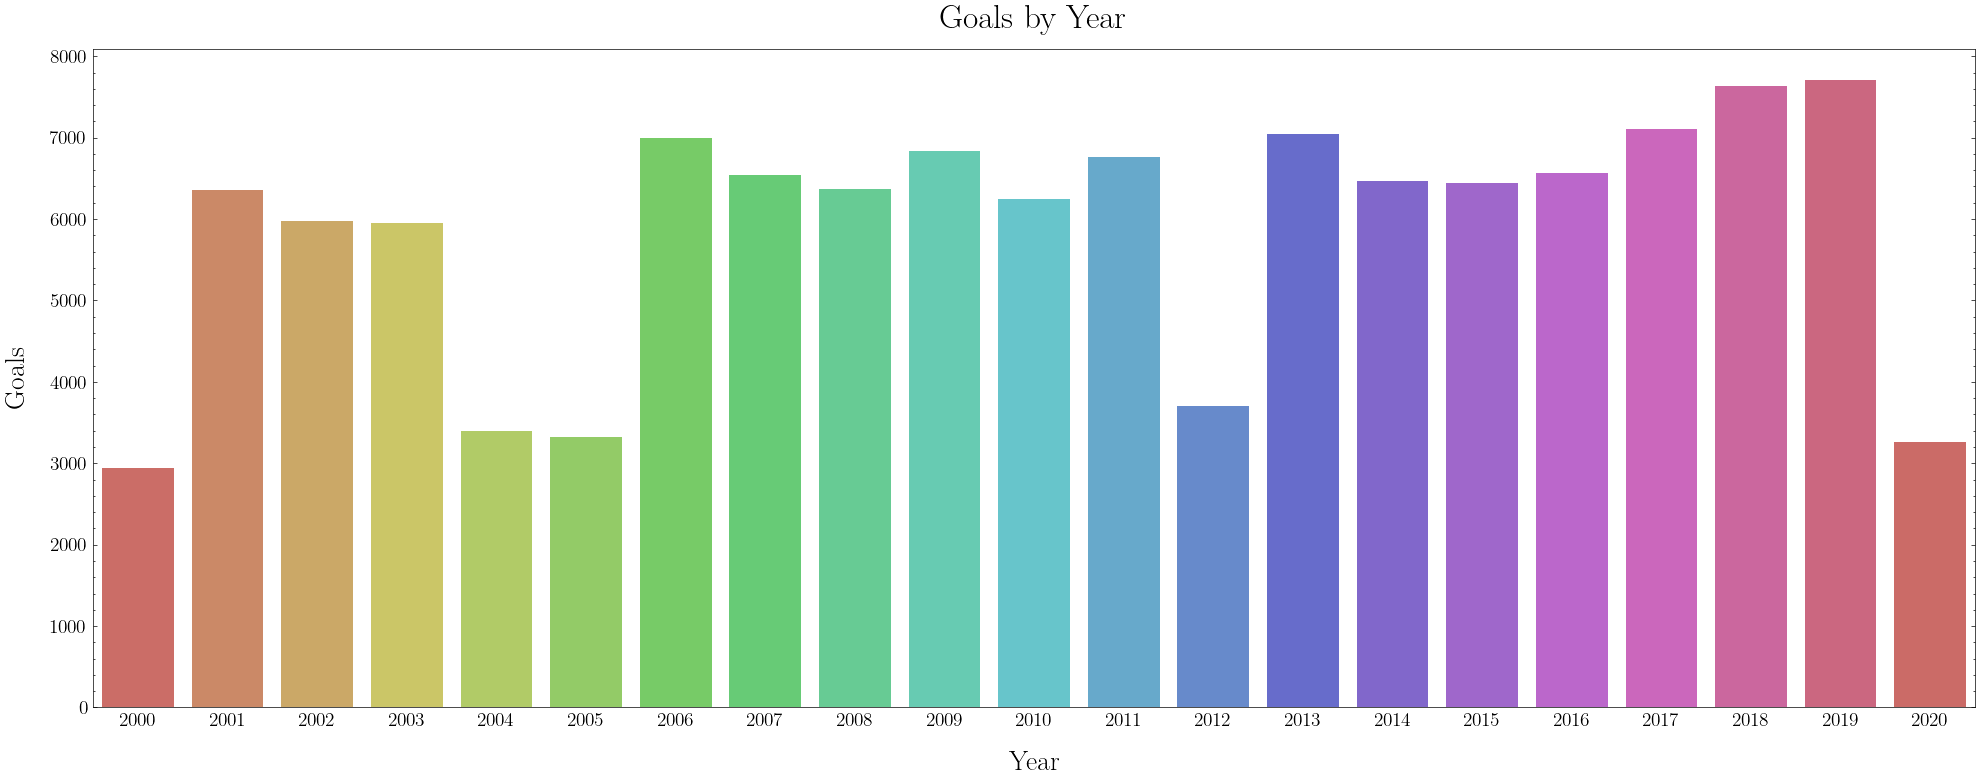

In [16]:
# The 2000 season does not seem to record everything
# The 2004-2005/2012 season(s) suffered from a strike/lockout
# The 2020 season suffered from the pandemic

figsize = (20, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.countplot(
    data=dataframe, 
    x='date', 
    hue='date',
    legend=False,
    palette='hls'
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Year')
ax.set_ylabel('Goals')

ax.set_title('Goals by Year')

plt.tight_layout()
plt.show()
plt.close()

**How many goals are scored depending on "strength"?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goal

    *   **Categorical**
        *   **Nominal**: Strength


2. Graphical component -- what kinds of plot can you use?
    * Countplot
    * Barplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Strength
    * **y-axis**: Goals


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting how many goals are scored by "strength".
    * It would be ideal to show the exact amount of goals scored by stregth.
    * A countplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * The graph itself is not misleading, as it is simple to interpret.
    * The NHL API is inconsistent (including this dataset), and does not record everything (or at least it is not digitized as well as it could be).

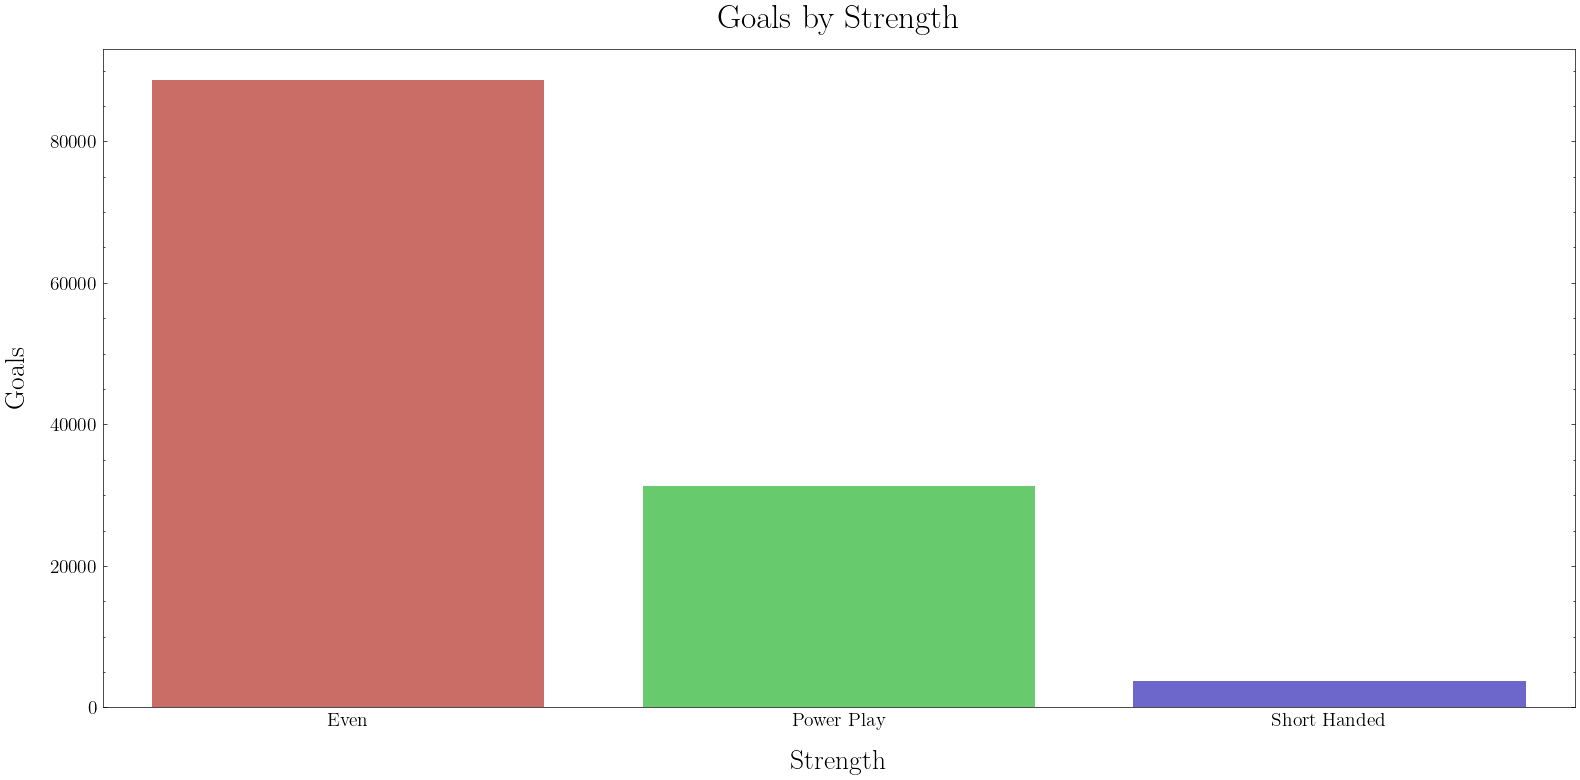

In [17]:
figsize = (16, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.countplot(
    data=dataframe, 
    x='strength', 
    hue='strength',
    legend=False,
    palette='hls'
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Strength')
ax.set_ylabel('Goals')

ax.set_title('Goals by Strength')

plt.tight_layout()
plt.show()
plt.close()

**Where are winning goals scored from and what is the strength at the time?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Continous**: (x, y) coordinates

    *   **Categorical**
        *   **Nominal**: Strength


2. Graphical component -- what kinds of plot can you use?
    * Scatterplot
    * 2D Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: x
    * **y-axis**: y


4. Esthetic component -- what should your plot say, and how best to do this?
    * The original (x, y) coordinates would be better if the purpose of the plot was to focus on a single game. This attempt is convoluted, and is improved in the plot below using standardized (x, y) coordinates.
    * It is trying to illustrate the (x, y) coordinates of game winning goals scored on the ice by strength (i.e., even, power play or short-handed). However, it would be much more effective as an interactive plot where it could be filtered by strength, which would make it less cluttered.


5. Ethical component -- Is the graph misleading, what is left out?
    * There are coordinates missing from goals, due to some data not being collected.
    * The plot itself could use an illustration of a net or faceoff circle(s), which might help depict the range of the initial shot to the net.

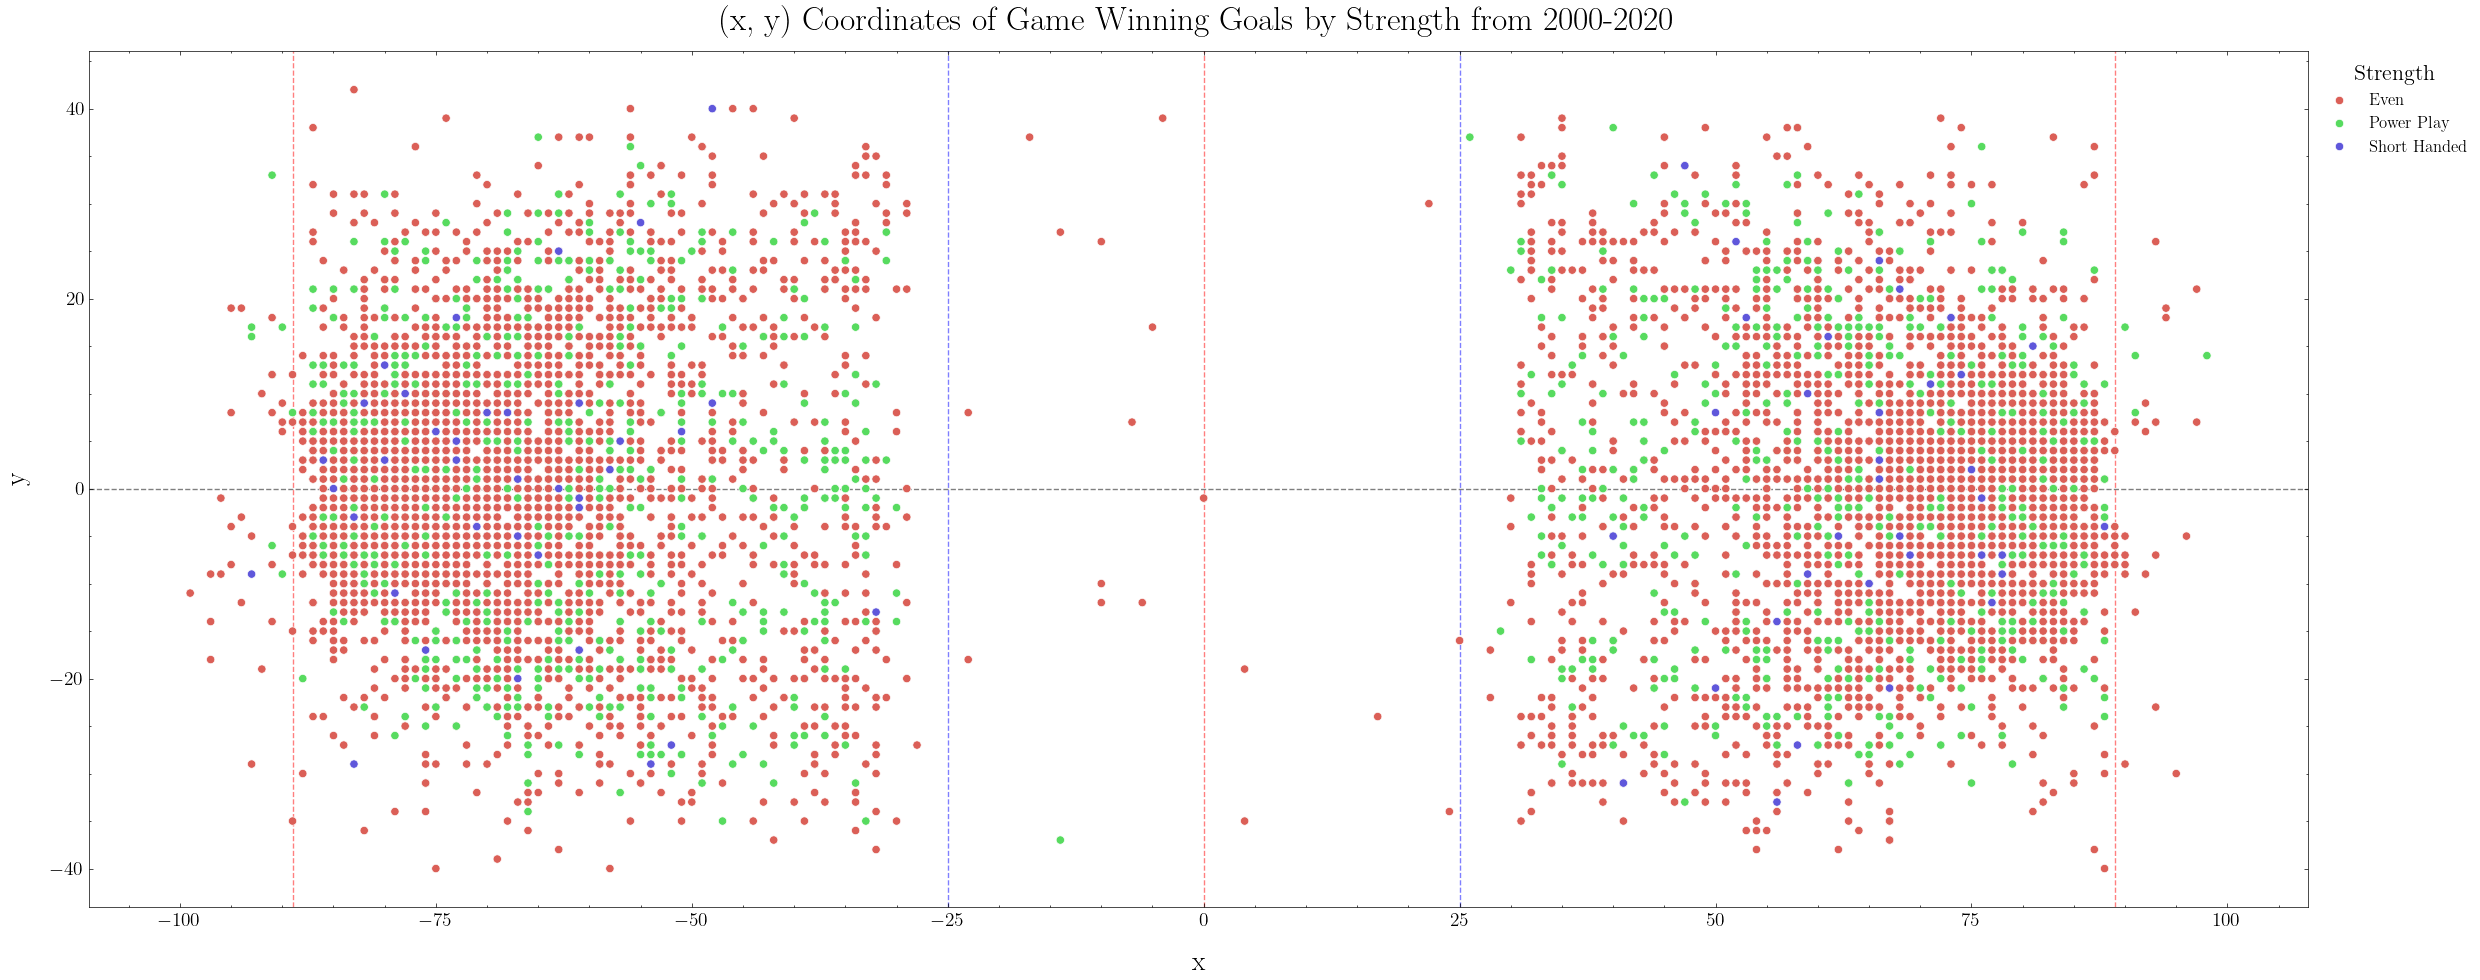

In [18]:
condition = (
    (dataframe['gameWinningGoal'] == True) &
    (dataframe['x'].isnull() == False) &
    (dataframe['y'].isnull() == False)
)

coordinates = dataframe[condition]

figsize = (25, 10)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=coordinates, 
    x='x', 
    y='y', 
    hue='strength', 
    legend=True,
    palette='hls'
)

plt.axhline(0, ls='--', color='black', alpha=0.50, zorder=0.0)
plt.axvline(0, ls='--', color='red', alpha=0.50, zorder=0.0)
plt.axvline(-25, ls='--', color='blue', alpha=0.50, zorder=0.0)
plt.axvline(25, ls='--', color='blue', alpha=0.50, zorder=0.0)
plt.axvline(89, ls='--', color='red', alpha=0.50, zorder=0.0)
plt.axvline(-89, ls='--', color='red', alpha=0.50, zorder=0.0)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('(x, y) Coordinates of Game Winning Goals by Strength from 2000-2020')

plt.legend(
    bbox_to_anchor=(1, 1),
    loc='upper left', 
    title='Strength'
)

plt.tight_layout()
plt.show()
plt.close()

**Where are winning goals scored from and what is the strength at the time?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Continous**: Standardized (x, y) coordinates

2. Graphical component -- what kinds of plot can you use?
    * Scatterplot
    * 2D Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: x
    * **y-axis**: y


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is trying to illustrate the standardized (x, y) coordinates of game winning goals scored on the ice by strength (i.e., even, power play or short-handed). However, it would be much more effective as an interactive plot where it could be filtered by strength, which would make it less cluttered.
    * The standardized version of this scatterplot is better at communicating the bigger picture, and showcasing where goals are scored.


5. Ethical component -- Is the graph misleading, what is left out?
    * There are coordinates missing from goals, due to some data not being collected.
    * The plot itself could use an illustration of a net or faceoff circle(s), which might help depict the range of the initial shot to the net.

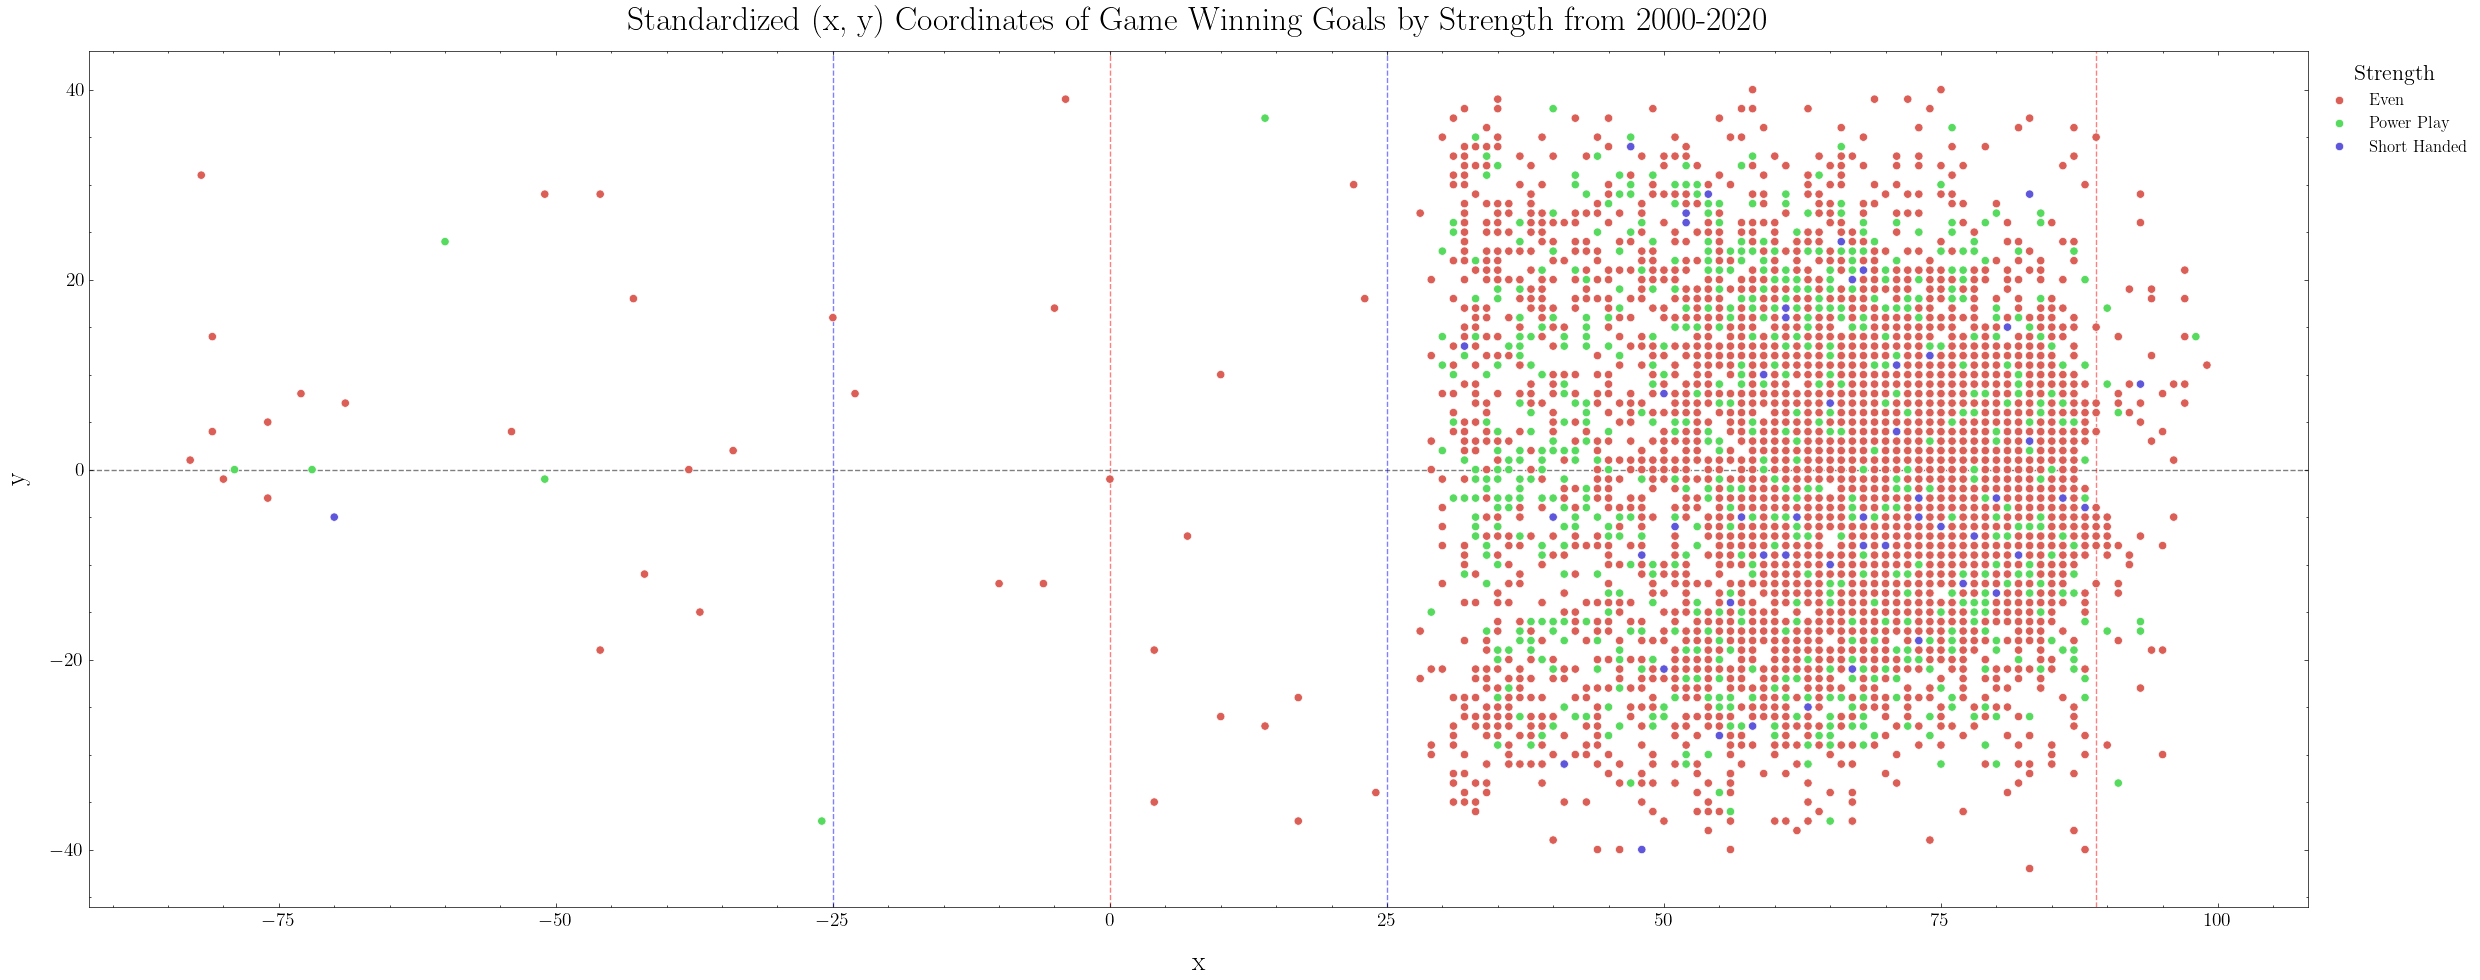

In [19]:
condition = (
    (dataframe['gameWinningGoal'] == True) &
    (dataframe['st_x'].isnull() == False) &
    (dataframe['st_y'].isnull() == False)
)

coordinates = dataframe[condition]

figsize = (25, 10)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=coordinates, 
    x='st_x', 
    y='st_y', 
    hue='strength', 
    legend=True,
    palette='hls'
)

plt.axhline(0, ls='--', color='black', alpha=0.50, zorder=0.0)
plt.axvline(0, ls='--', color='red', alpha=0.50, zorder=0.0)
plt.axvline(-25, ls='--', color='blue', alpha=0.50, zorder=0.0)
plt.axvline(25, ls='--', color='blue', alpha=0.50, zorder=0.0)
plt.axvline(89, ls='--', color='red', alpha=0.50, zorder=0.0)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('Standardized (x, y) Coordinates of Game Winning Goals by Strength from 2000-2020')

plt.legend(
    bbox_to_anchor=(1, 1),
    loc='upper left', 
    title='Strength'
)

plt.tight_layout()
plt.show()
plt.close()

**Where are winning goals scored from?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Continous**: (x, y) coordinates


2. Graphical component -- what kinds of plot can you use?
    * 2D Histogram
    * Scatterplot


3. Label component -- what should be on the plot axis?
    * **x-axis**: x
    * **y-axis**: y


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is trying to illustrate the (x, y) coordinates of game winning goals scored on the ice.
    * The standardized version of the heatmap is better at communicating the bigger picture, and showcasing where goals are scored.


5. Ethical component -- Is the graph misleading, what is left out?
    * There are coordinates missing from goals, due to some data not being collected .
    * The heatmap itself could use an image overlay of the rink, net, lines, and faceoff circle(s), which might help depict the range of the initial shot to the net.

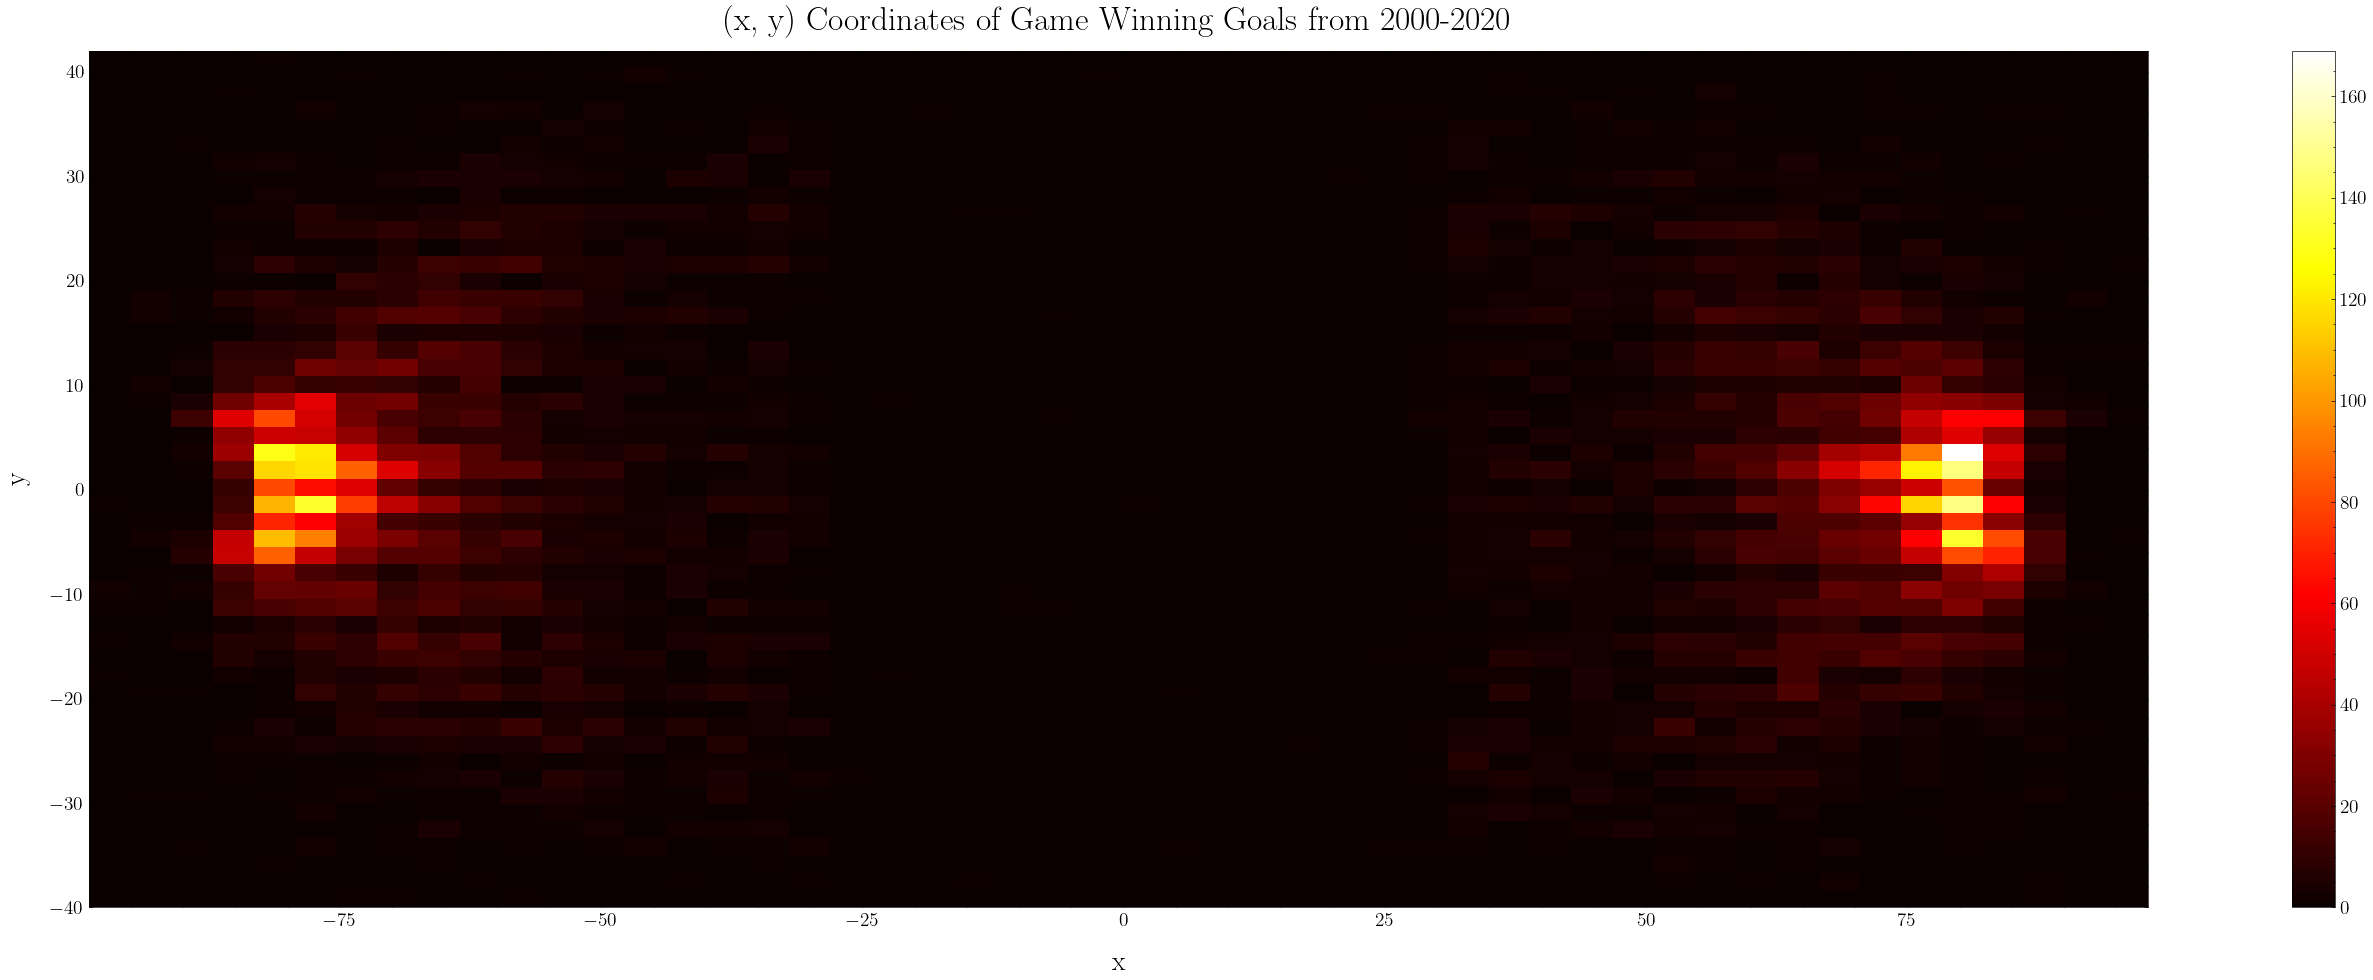

In [20]:
condition = (
    (dataframe['gameWinningGoal'] == True) &
    (dataframe['x'].isnull() == False) &
    (dataframe['y'].isnull() == False)
)

coordinates = dataframe[condition]

figsize = (30, 10)
fig, ax = plt.subplots(figsize=figsize)

heatmap, xedges, yedges = np.histogram2d(
    coordinates.x,
    coordinates.y,
    bins=50
)

extent = [
    xedges[0],
    xedges[-1],
    yedges[0],
    yedges[-1]
]

im = plt.imshow(
    heatmap.T,
    extent=extent,
    origin='lower',
    interpolation='nearest',
    cmap='hot'
)

fig.colorbar(im, ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('(x, y) Coordinates of Game Winning Goals from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**Where are winning goals scored from?**


1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Continous**: Standardized (x, y) coordinates


2. Graphical component -- what kinds of plot can you use?
    * 2D Histogram
    * Scatterplot


3. Label component -- what should be on the plot axis?
    * **x-axis**: x
    * **y-axis**: y


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is trying to illustrate the (x, y) coordinates of game winning goals scored on the ice.
    * This heatmap is better at communicating the bigger picture, and showcasing where goals are scored in general.


5. Ethical component -- Is the graph misleading, what is left out?
    * There are coordinates missing from goals, due to some data not being collected.
    * The heatmap itself could use an image overlay of the rink, net, lines, and faceoff circle(s), which might help depict the range of the initial shot to the net.

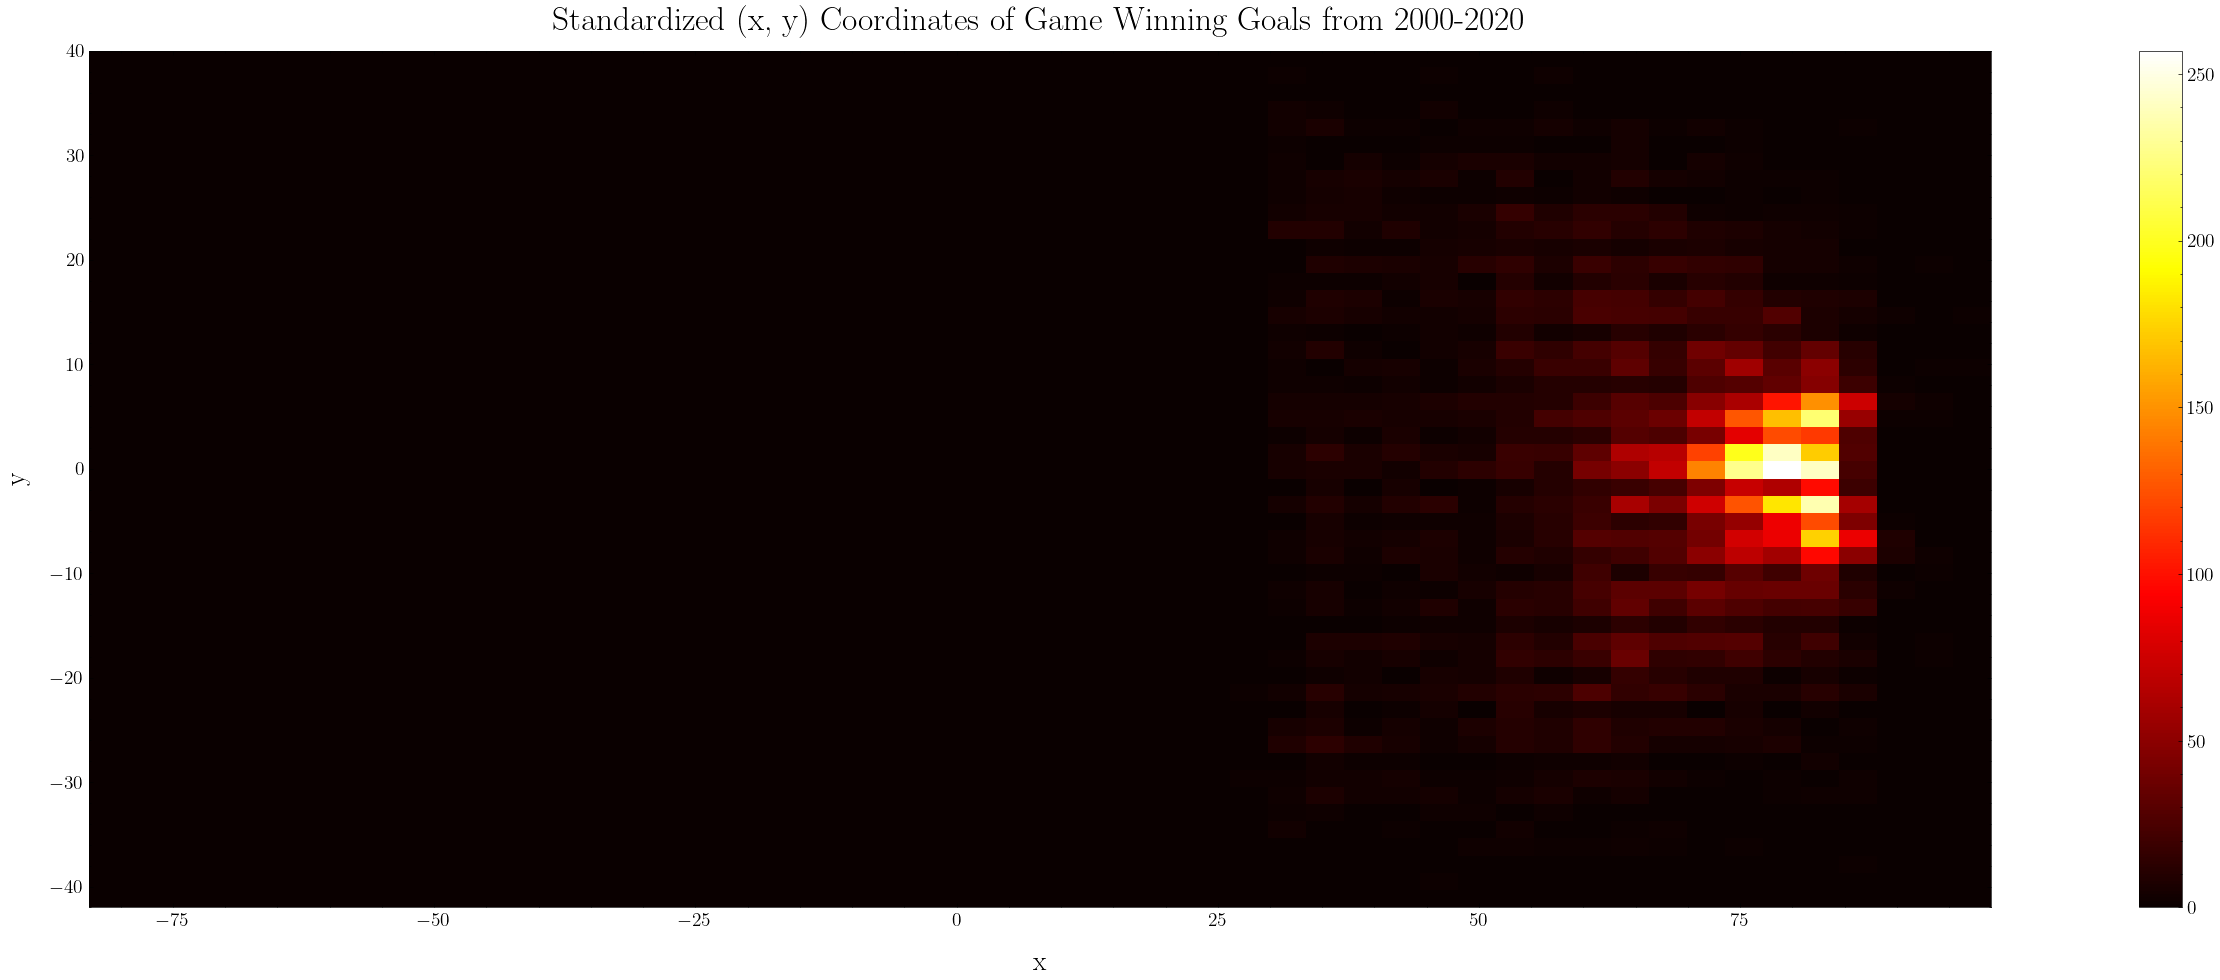

In [21]:
condition = (
    (dataframe['gameWinningGoal'] == True) &
    (dataframe['st_x'].isnull() == False) &
    (dataframe['st_y'].isnull() == False)
)

coordinates = dataframe[condition]

figsize = (30, 10)
fig, ax = plt.subplots(figsize=figsize)

heatmap, xedges, yedges = np.histogram2d(
    coordinates.st_x,
    coordinates.st_y,
    bins=50
)

extent = [
    xedges[0],
    xedges[-1],
    yedges[0],
    yedges[-1]
]

im = plt.imshow(
    heatmap.T,
    extent=extent,
    origin='lower',
    interpolation='nearest',
    cmap='hot'
)

fig.colorbar(im, ax=ax)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title('Standardized (x, y) Coordinates of Game Winning Goals from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**Who are the top goal scorers?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goals

    *   **Categorical**
        *   **Nominal**: Players


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Player
    * **y-axis**: Goals


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting the top 10 goal scorers from 2000-2020.
    * It would be ideal to show the exact amount of goals scored by each player.
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * The graph itself is not misleading, as it is simple to interpret.
    * The NHL API is inconsistent (including this dataset), and does not record everything (or at least it is not digitized as well as it could be). As a result, there could be discrepancies if more players are included in the graph. However, these 10 players have prominent legacies and well-documented records from the NHL).
    * It would be important to indicate that some of these players were playing even before the 2000's, but it is noted in the title that the range covered is from 2000-2020.

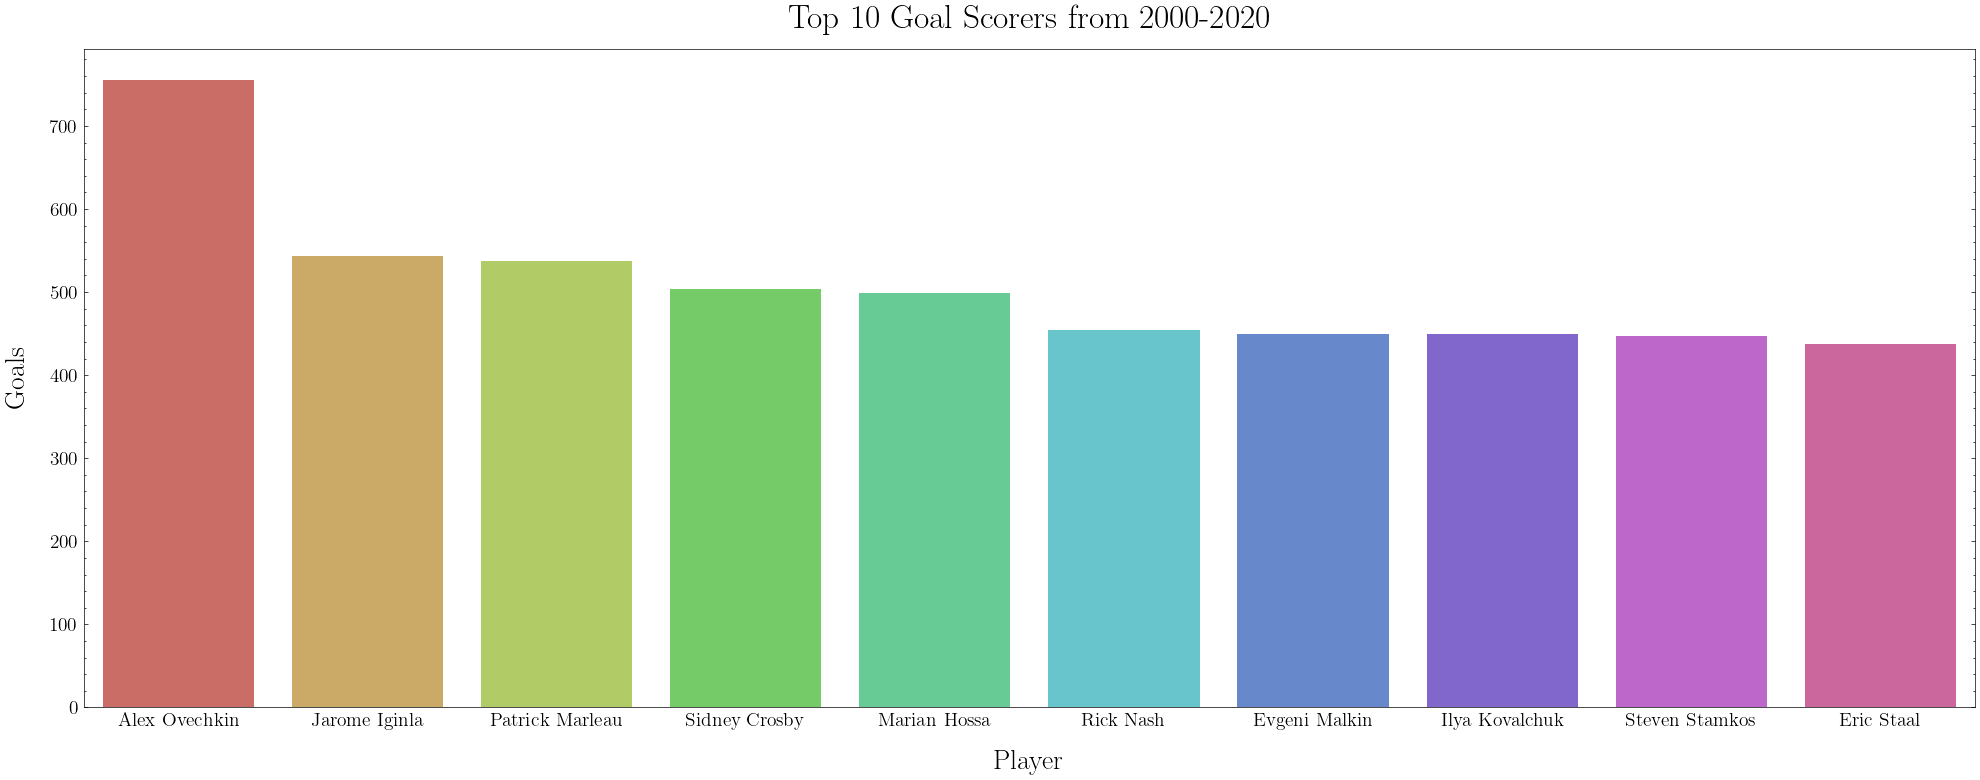

In [22]:
figsize = (20, 8)
fig, ax = plt.subplots(figsize=figsize)

goal = df_statistics.sort_values('goals', ascending=False)

sns.barplot(
    data=goal.head(10), 
    x='fullName', 
    y='goals',
    hue='fullName',
    legend=False,
    palette='hls'
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Player')
ax.set_ylabel('Goals')

ax.set_title('Top 10 Goal Scorers from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**What position(s) score the most goals?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goals

    *   **Categorical**
        *   **Nominal**: Position


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Position
    * **y-axis**: Goals


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting what positions score the most goals.
    * It would be ideal to show the exact amount of goals scored by each position.
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * It is not misleading, as it is simple to interpret
    * The NHL API is inconsistent (including this dataset), and does not record everything (or at least it is not digitized as well as it could be).
    * The defensemen are grouped as a single category, despite typically having two defensemen on the ice for most of the game. It is not divided as the wingers are (i.e., left-wing and right-wing).
        * This might be important to mention to those who do not watch hockey.

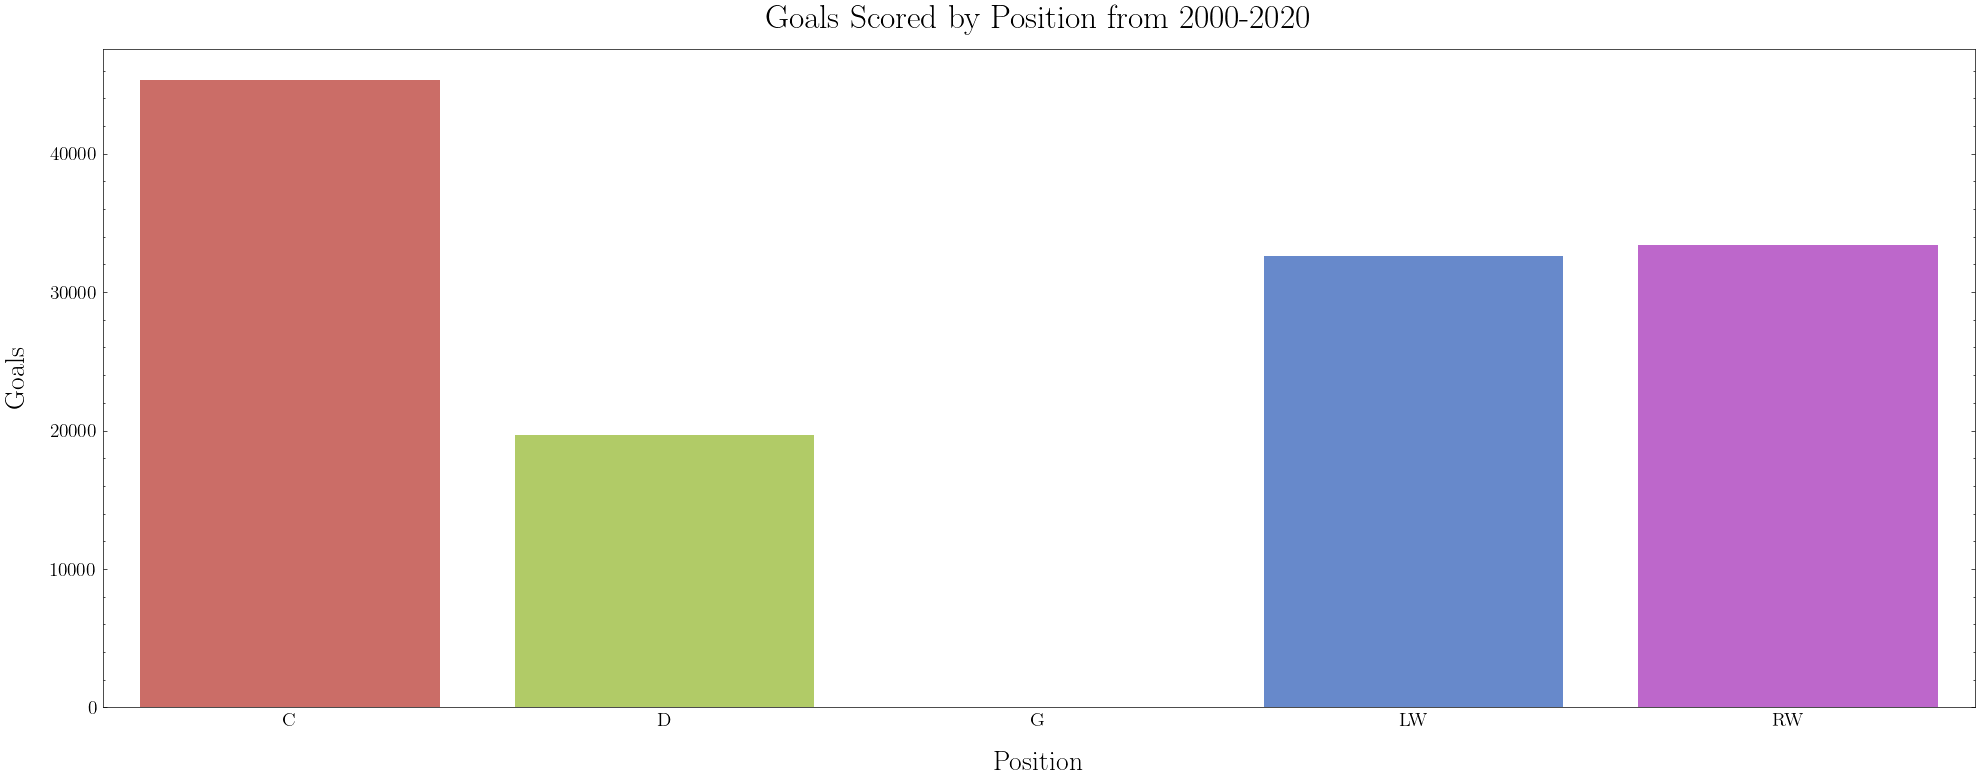

In [23]:
figsize = (20, 8)
fig, ax = plt.subplots(figsize=figsize)

position = df_statistics.groupby('primaryPosition', as_index=False, observed=False).goals.sum()

sns.barplot(
    data=position, 
    x='primaryPosition', 
    y='goals',
    hue='primaryPosition',
    legend=False,
    palette='hls',
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Position')
ax.set_ylabel('Goals')

ax.set_title('Goals Scored by Position from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**What handedness scores the most goals?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goals

    *   **Categorical**
        *   **Nominal**: Handedness


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Handedness
    * **y-axis**: Goals


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting what handedness scores the most goals.
    * It would be ideal to show the exact amount of goals scored from each group
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * It is not misleading, as it is simple to interpret.

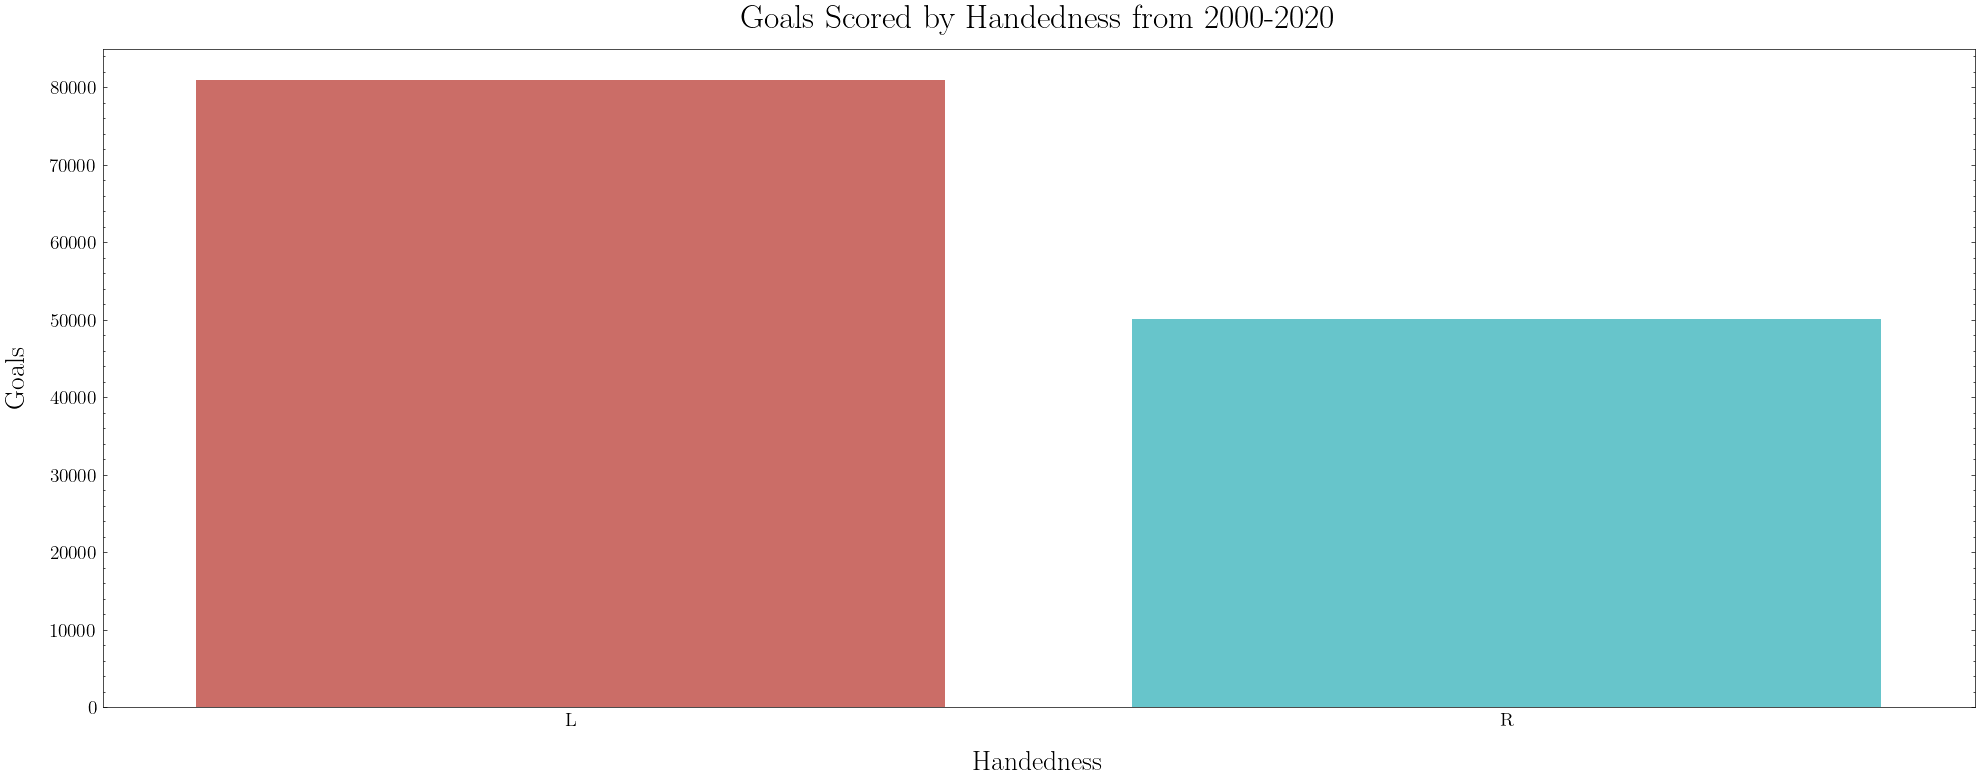

In [24]:
figsize = (20, 8)
fig, ax = plt.subplots(figsize=figsize)

position = df_statistics.groupby('shootsCatches', as_index=False, observed=False).goals.sum()

sns.barplot(
    data=position, 
    x='shootsCatches', 
    y='goals',
    hue='shootsCatches',
    legend=False,
    palette='hls',
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Handedness')
ax.set_ylabel('Goals')

ax.set_title('Goals Scored by Handedness from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**How is the NHL divided by nationality?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Amount of Players

    *   **Categorical**
        *   **Nominal**: Nationality


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Nationality
    * **y-axis**: Amount of Players


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting how many players are from a nationality.
    * It would be ideal to show the exact amount of players from each nationality.
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * The graph itself is not misleading, as it is simple to interpret.
    * The nationalities represented in the graph might be skewed, because Canada is often credited with popularizing hockey.

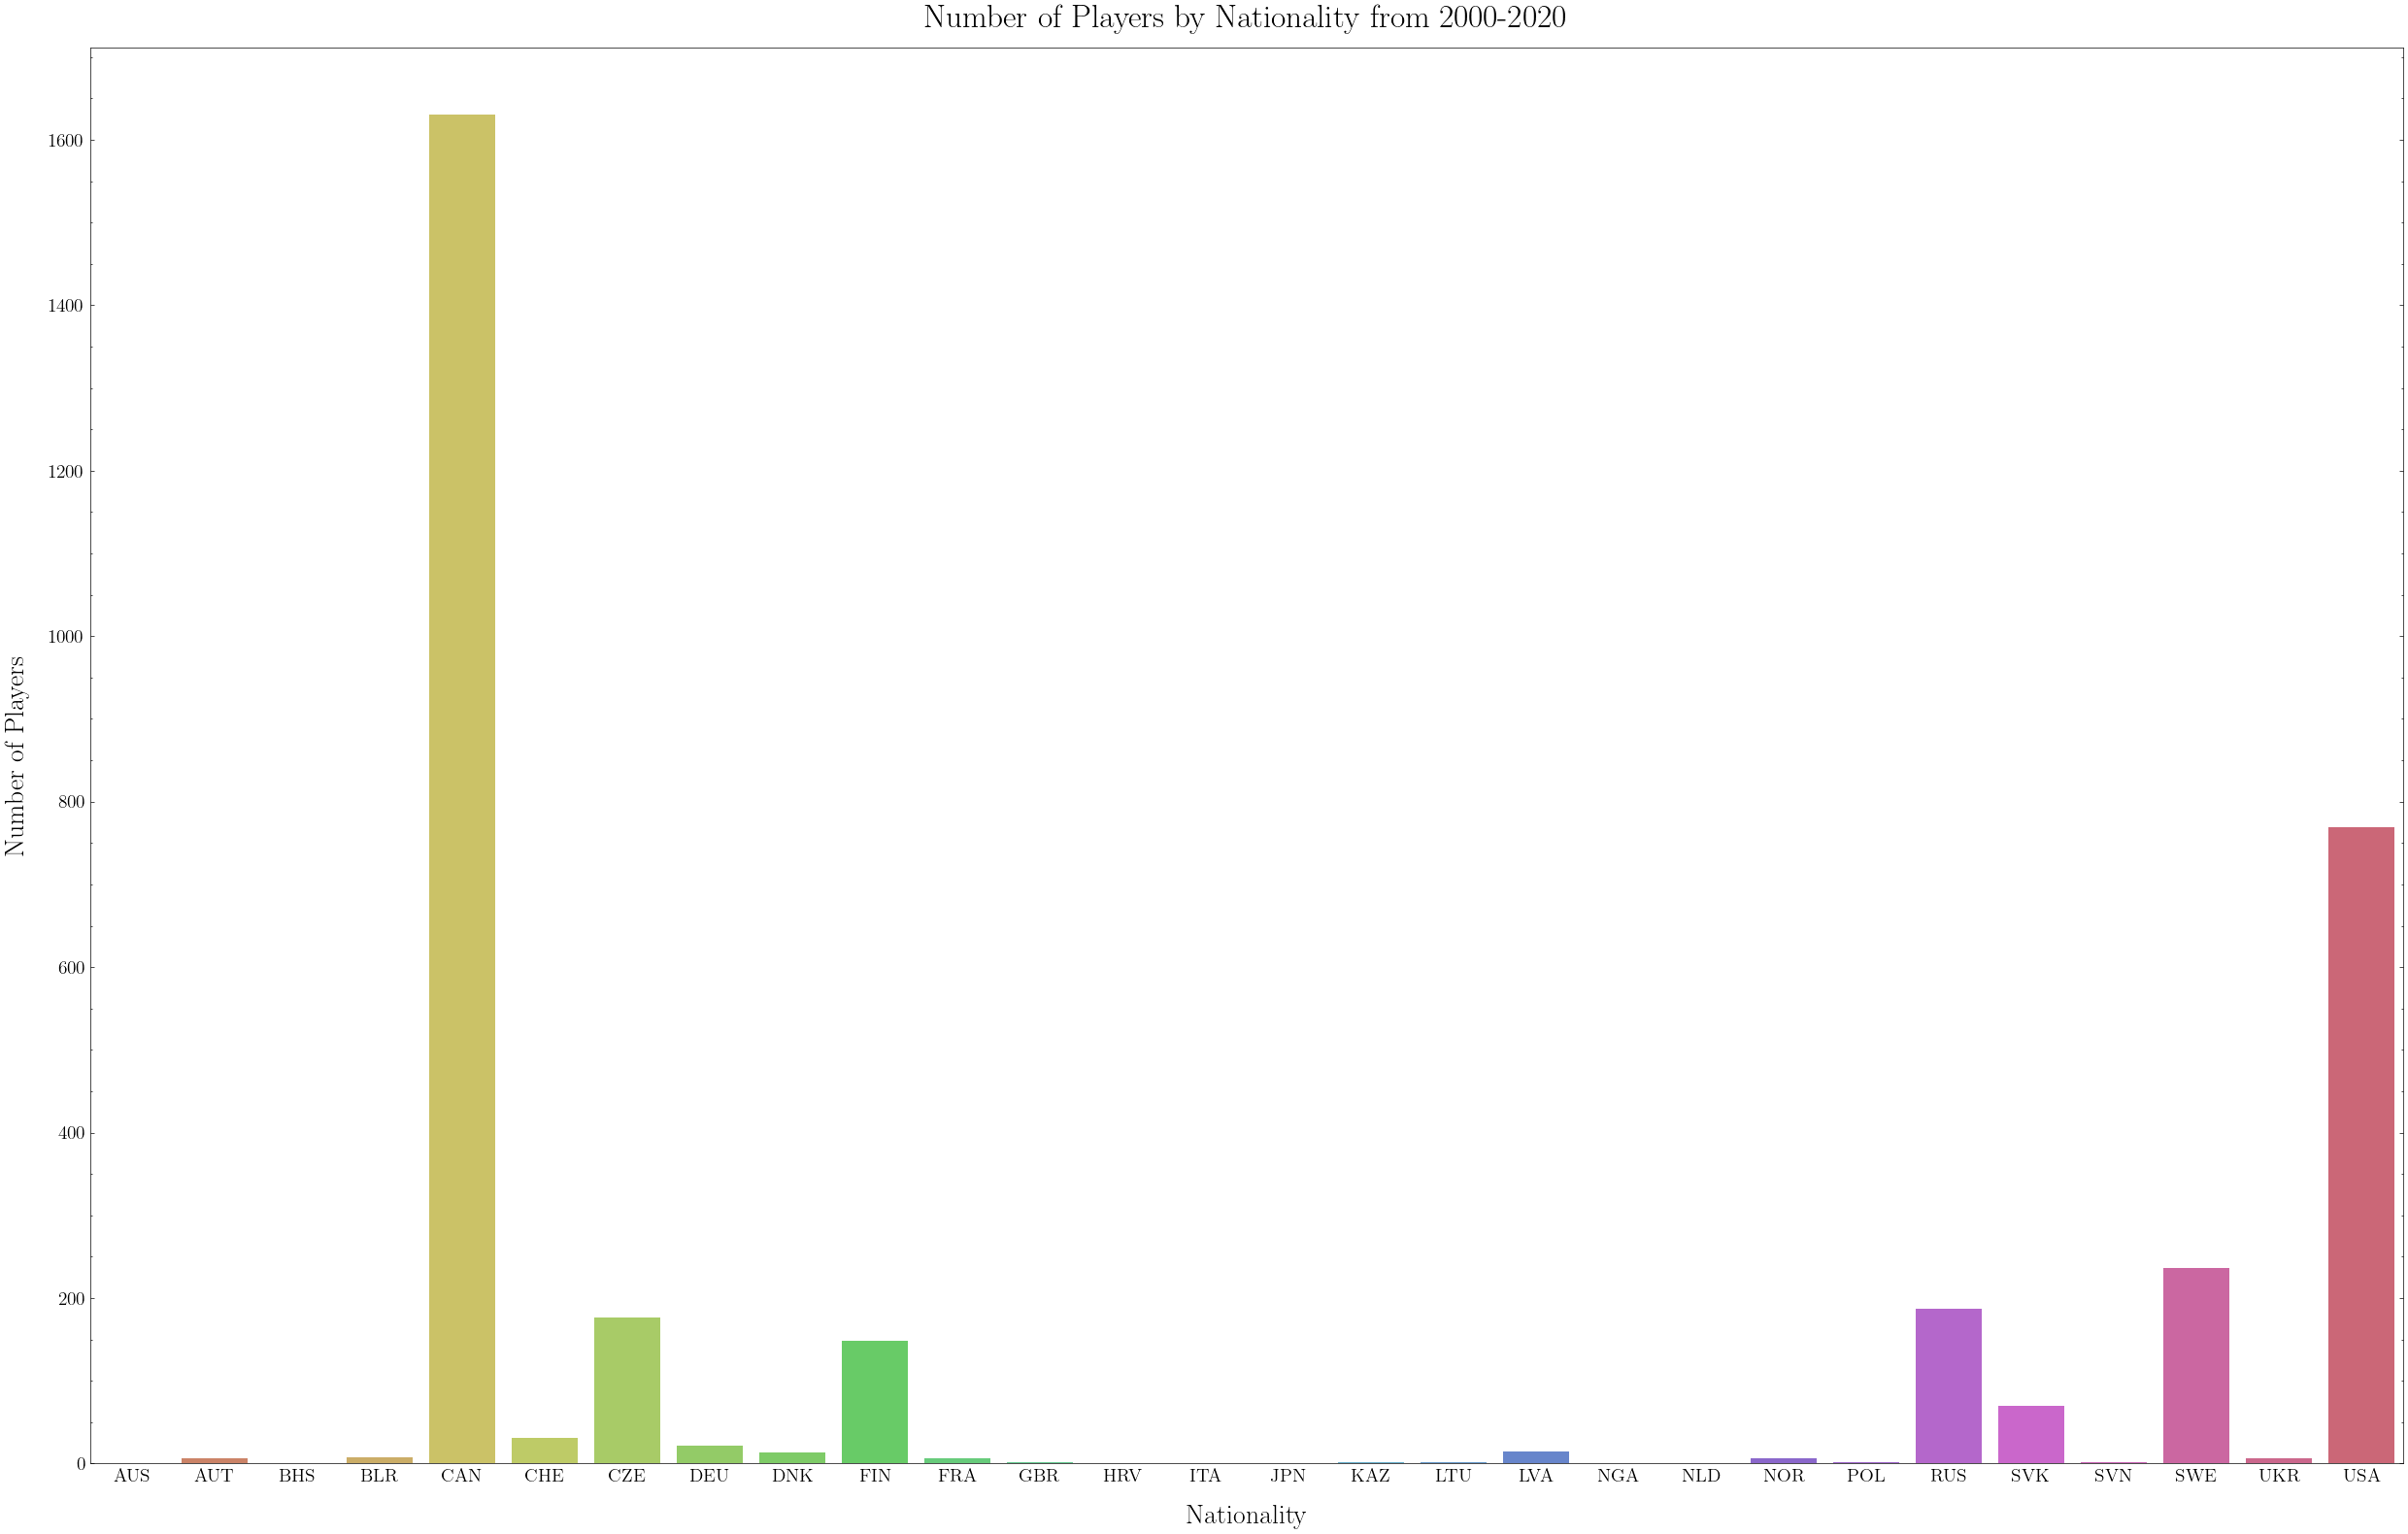

In [25]:
figsize = (25, 16)
fig, ax = plt.subplots(figsize=figsize)

nationality = df_statistics.groupby('nationality', as_index=False, observed=False).player_id.count()

sns.barplot(
    data=nationality, 
    x='nationality', 
    y='player_id',
    hue='nationality',
    legend=False,
    palette='hls',
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Nationality')
ax.set_ylabel('Number of Players')

ax.set_title('Number of Players by Nationality from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**What nationality scores the most goals?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goals

    *   **Categorical**
        *   **Nominal**: Nationality


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Goals
    * **y-axis**: Nationality


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting what nationality scores the most goals.
    * It would be ideal to show the exact amount of goals scored from each nationality.
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * The graph itself is not misleading, as it is simple to interpret.
    * The nationalities represented in the graph might be skewed, because Canada is often credited with popularizing hockey.

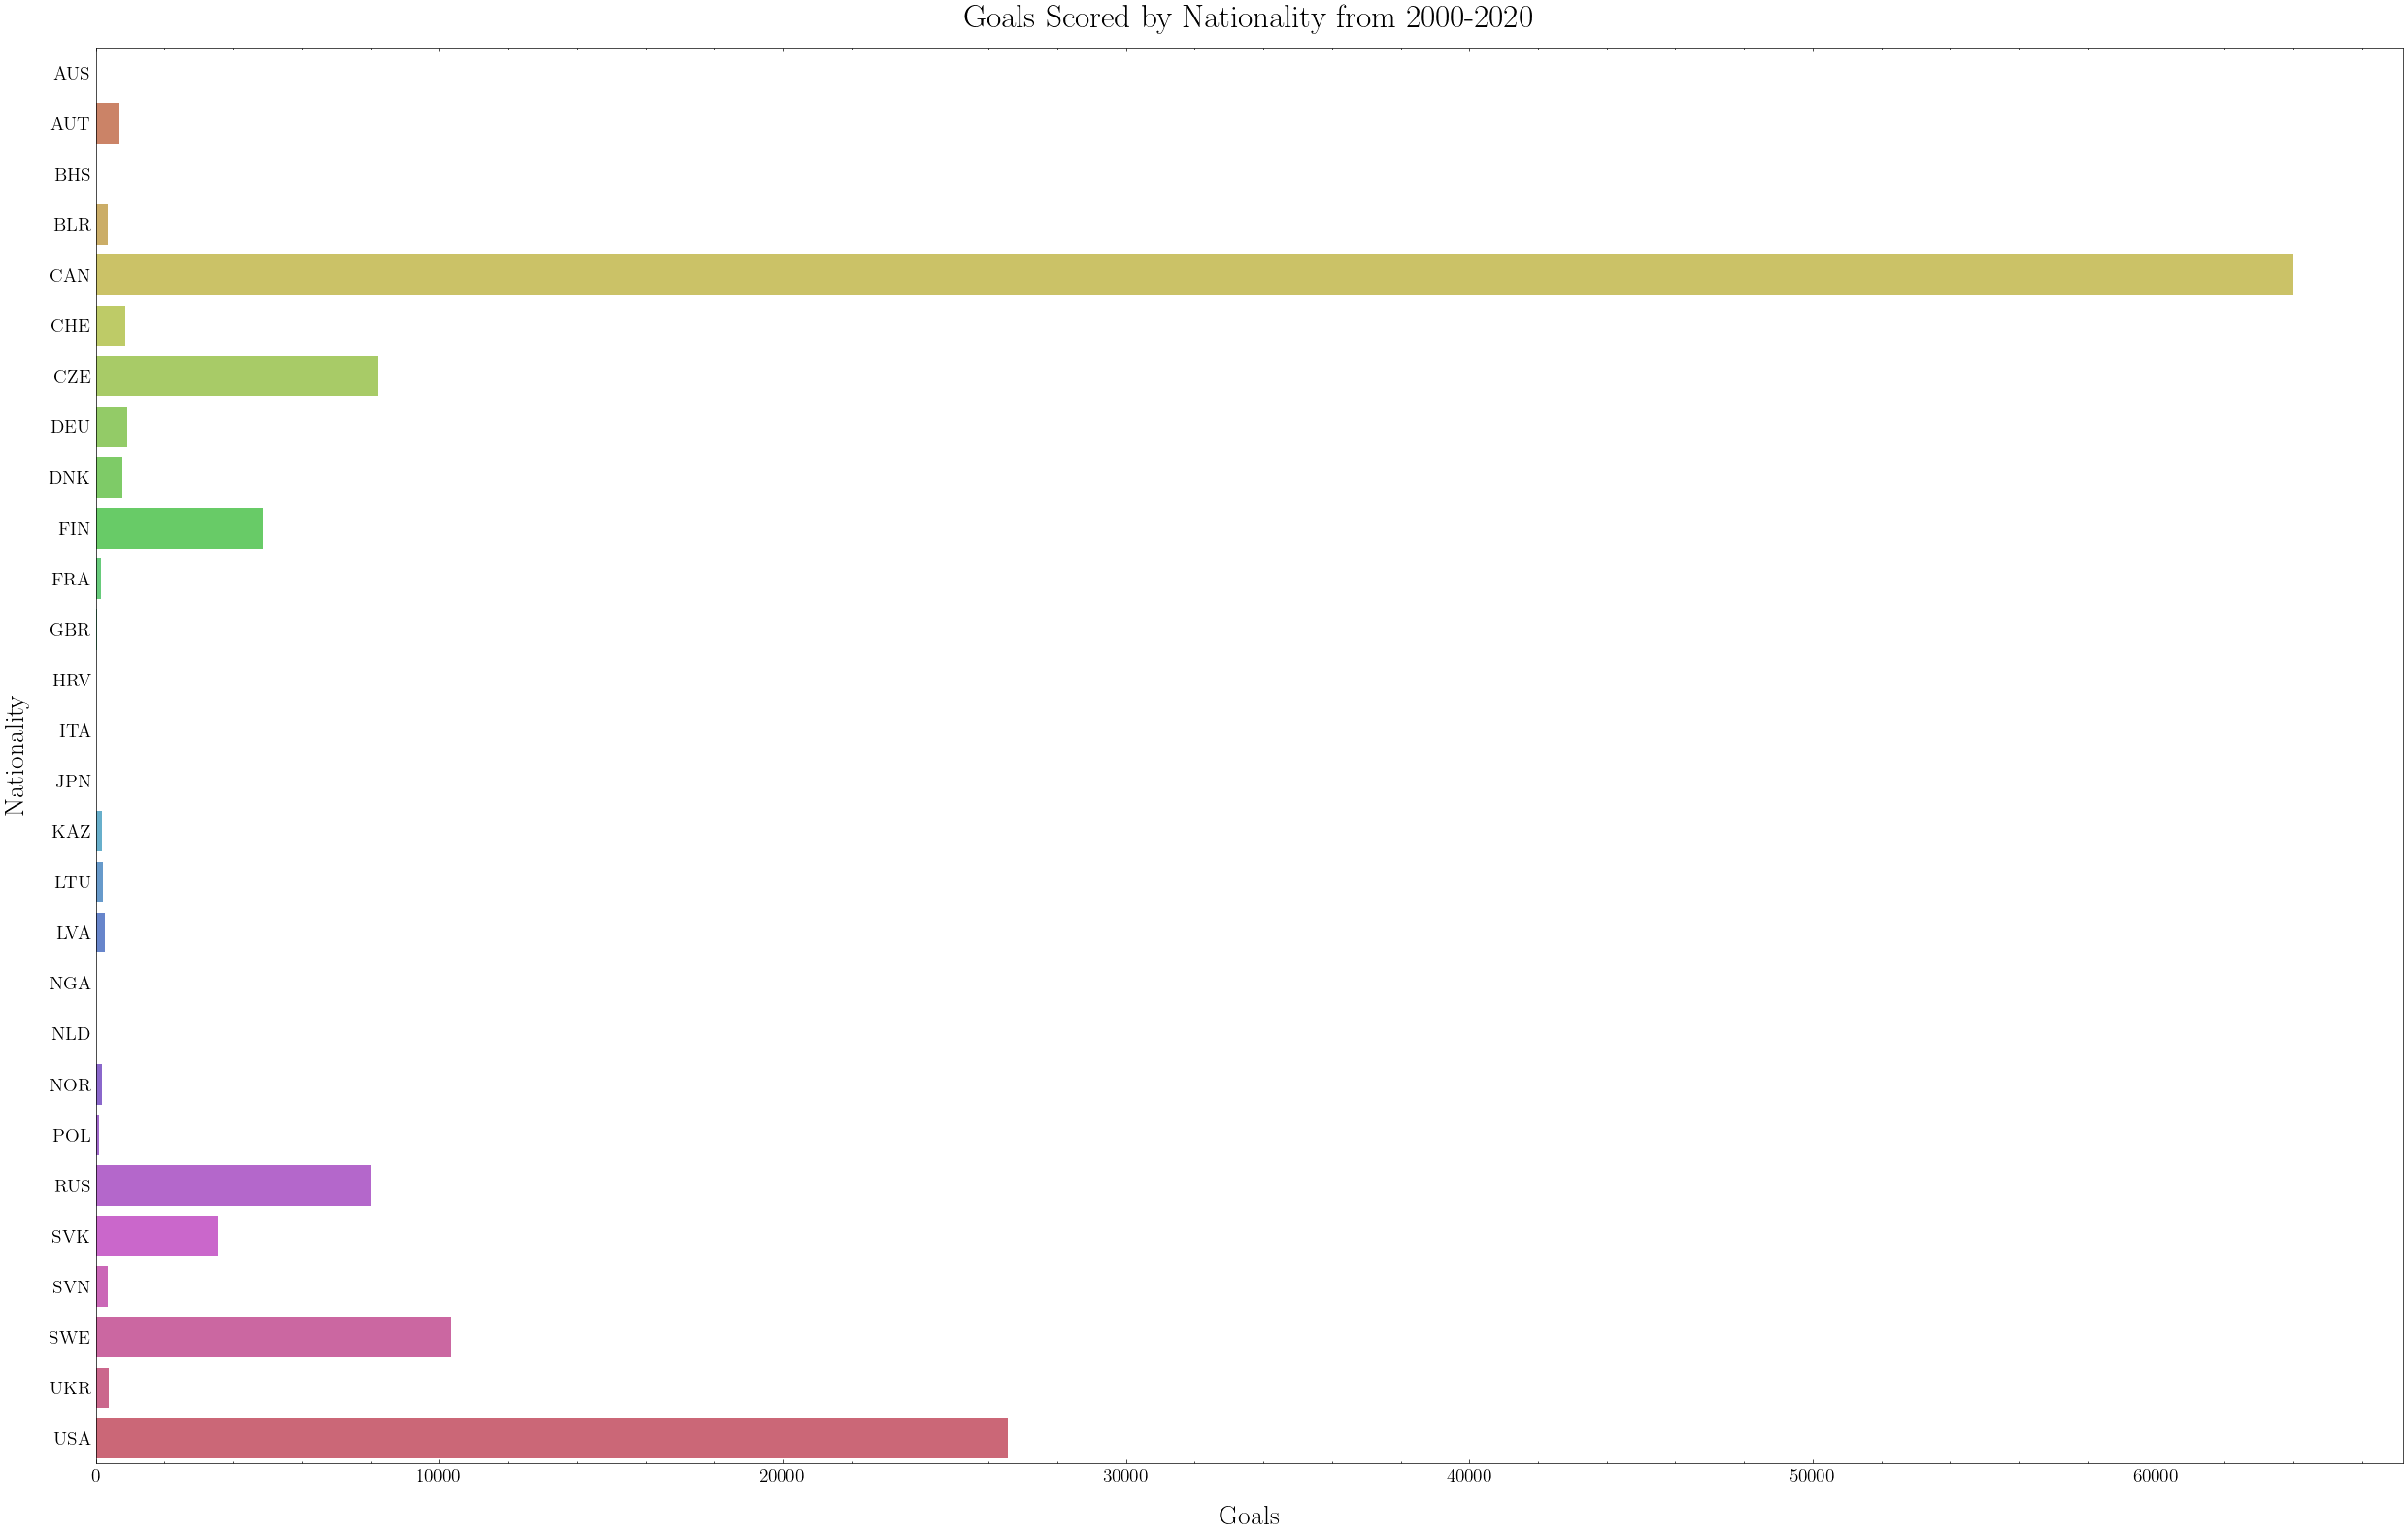

In [26]:
figsize = (25, 16)
fig, ax = plt.subplots(figsize=figsize)

nationality = df_statistics.groupby('nationality', as_index=False, observed=False).goals.sum()

sns.barplot(
    data=nationality, 
    x='goals', 
    y='nationality', 
    orient='h',
    hue='nationality',
    legend=False,
    palette='hls',
)

ax.tick_params(axis='y', which='both', left=False, right=False)

ax.set_xlabel('Goals')
ax.set_ylabel('Nationality')

ax.set_title('Goals Scored by Nationality from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**What type of goals are scored the most?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goals

    *   **Categorical**
        *   **Nominal**: Shot type


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram


3. Label component -- what should be on the plot axis?
    * **x-axis**: Goals
    * **y-axis**: Shot type


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting what type of shot results in a goal.
    * It would be ideal to show the exact amount of goals scored by each shot.
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret.


5. Ethical component -- Is the graph misleading, what is left out?
    * It is not misleading, as it is simple to interpret.

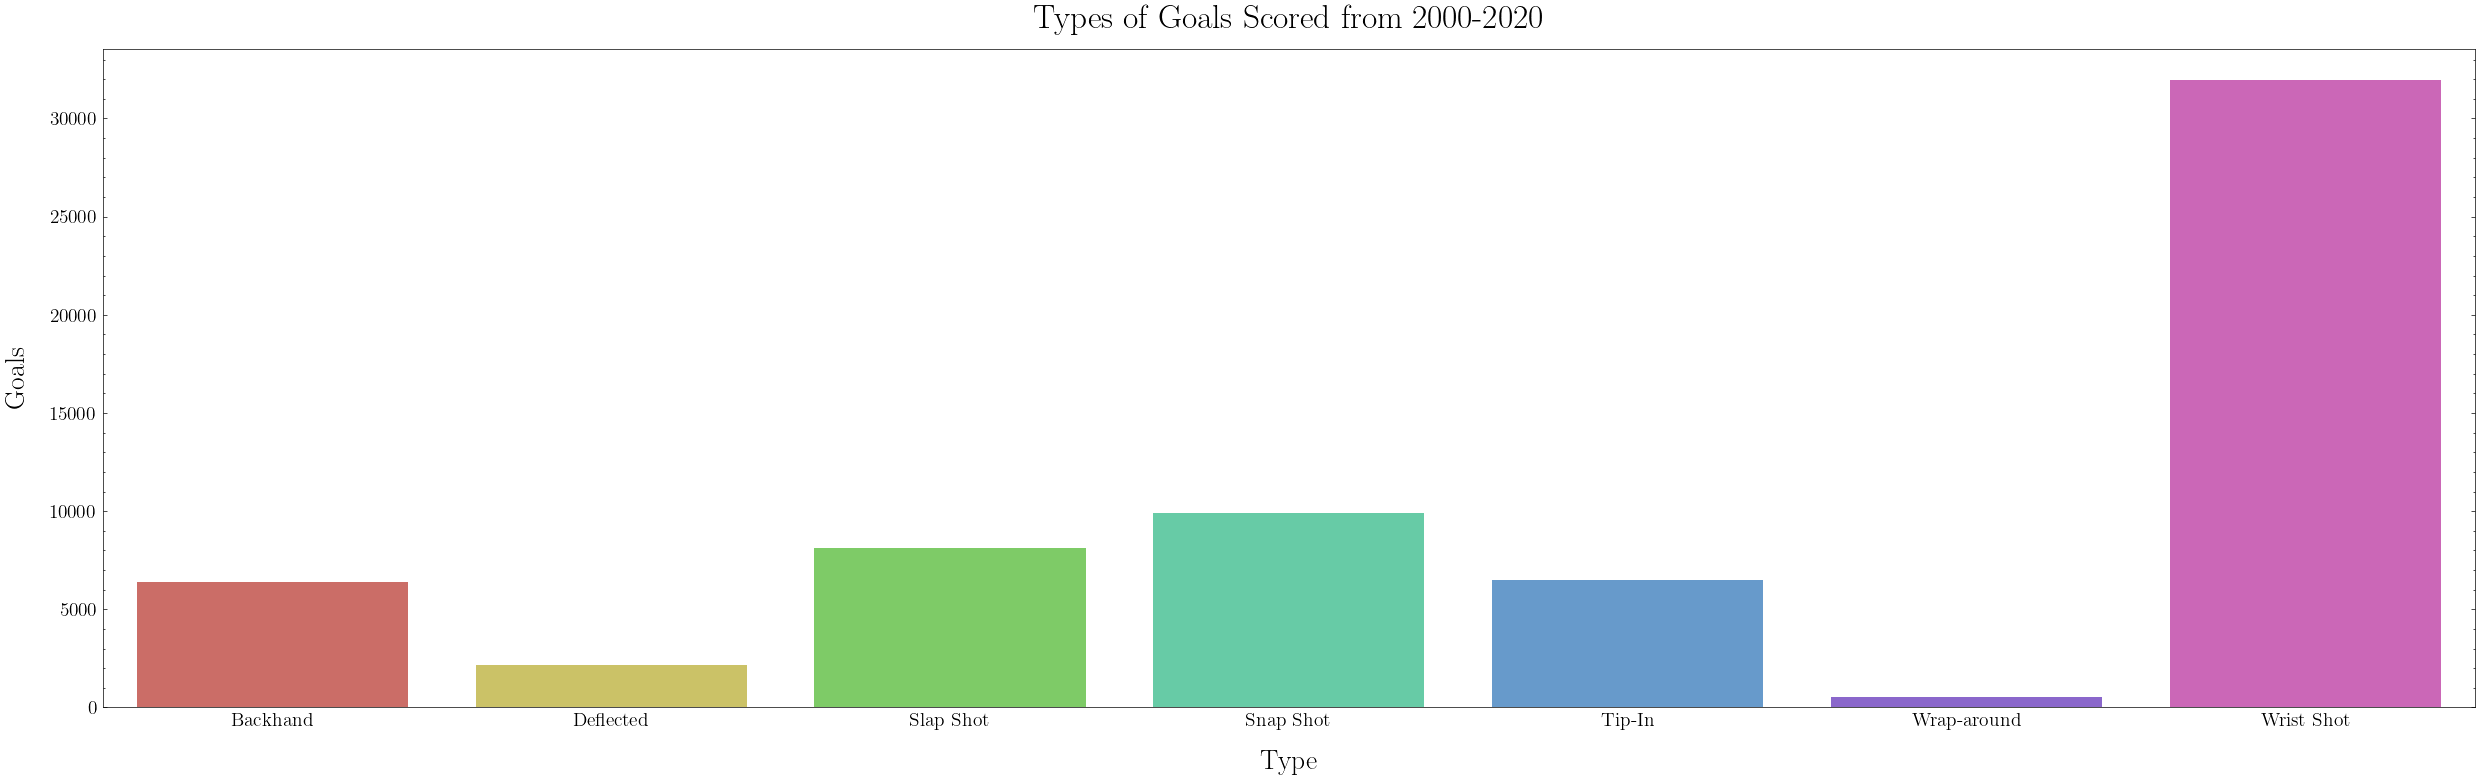

In [27]:
figsize = (25, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.barplot(
    data=df_shot, 
    x='type', 
    y='count', 
    orient='v',
    hue='type',
    legend=False,
    palette='hls',
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Type')
ax.set_ylabel('Goals')

ax.set_title('Types of Goals Scored from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

**What period are the most goals scored?**

1. Data component -- what kinds of data are you dealing with?
    *   **Numerical**
        *   **Discrete**: Goals

    *   **Categorical**
        *   **Ordinal**: Period


2. Graphical component -- what kinds of plot can you use?
    * Barplot
    * Countplot
    * Histogram
    

3. Label component -- what should be on the plot axis?
    * **x-axis**: Goals
    * **y-axis**: Period


4. Esthetic component -- what should your plot say, and how best to do this?
    * It is depicting in what period the most goals are scored in.
    * It would be ideal to show the exact amount of goals scored in each period.
    * A barplot would be perfect for this, as it is graphing categorical data and simple to interpret


5. Ethical component -- Is the graph misleading, what is left out?
    * It is not misleading, as it is simple to interpret.

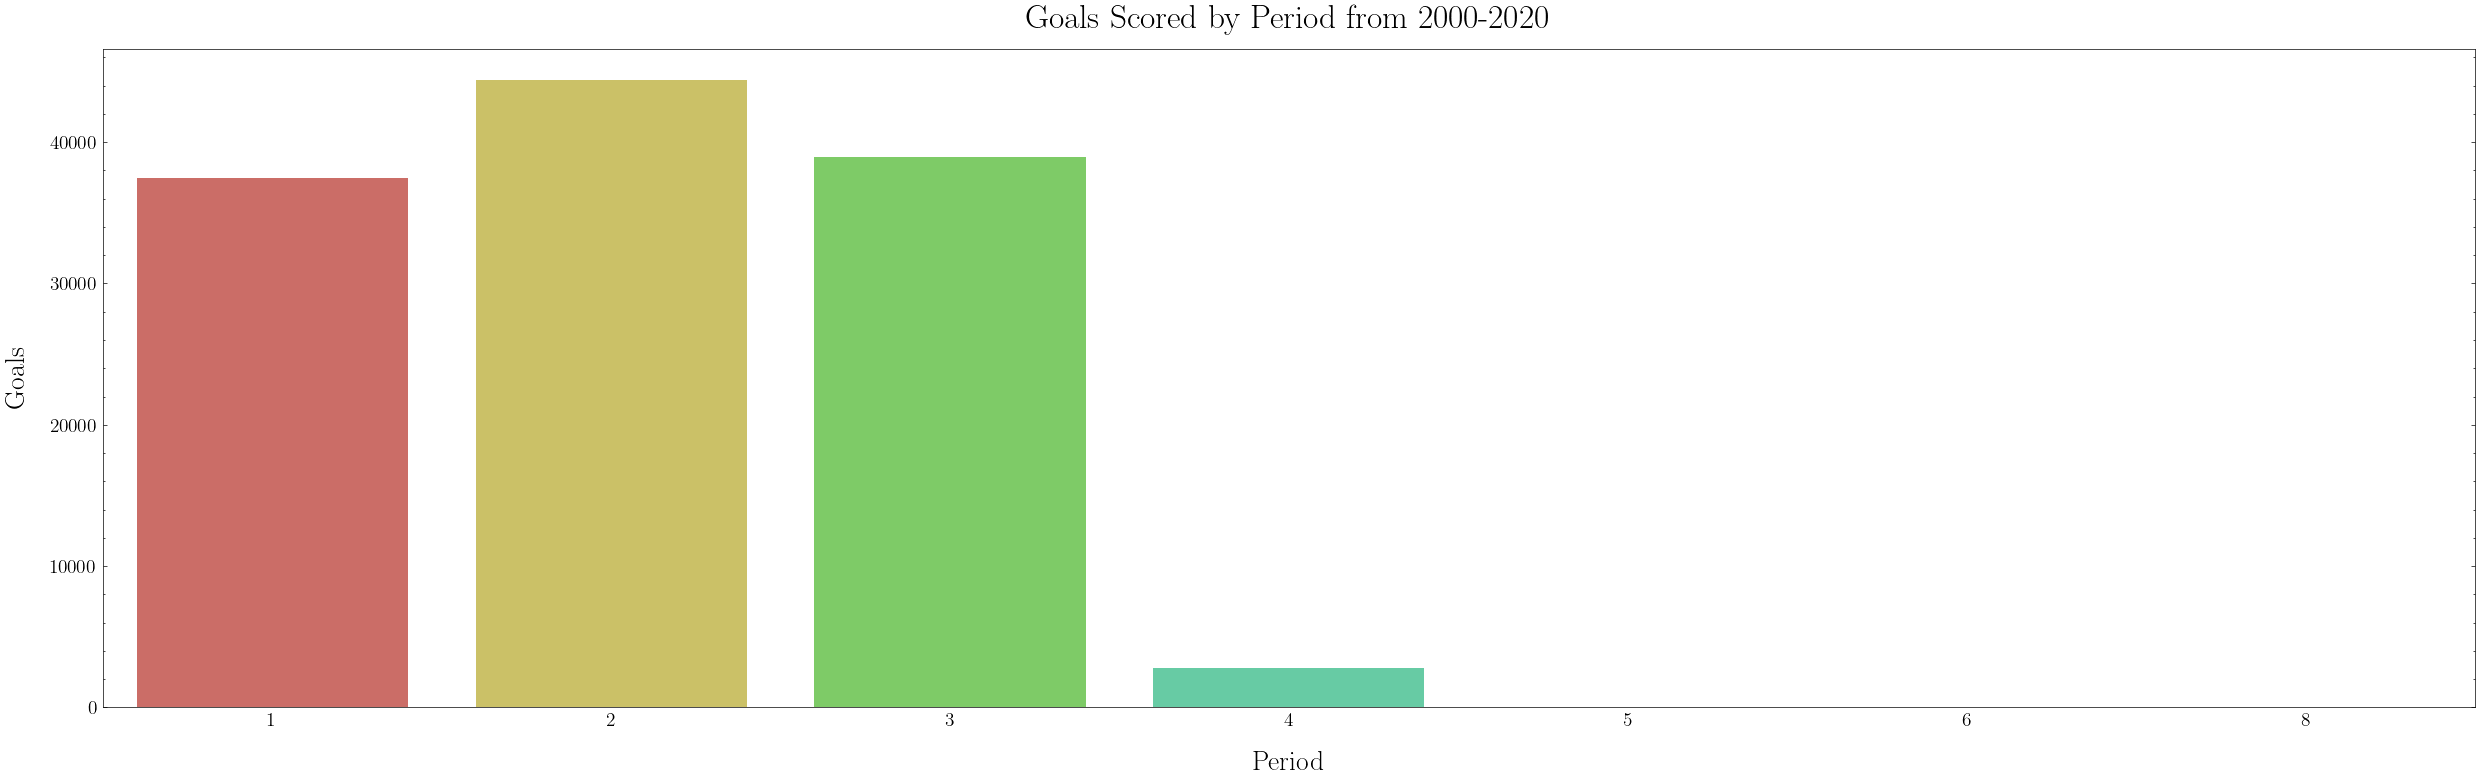

In [28]:
figsize = (25, 8)
fig, ax = plt.subplots(figsize=figsize)

period = dataframe.groupby('period', as_index=False).play_id.count()

sns.barplot(
    data=period, 
    x='period', 
    y='play_id',
    hue='period',
    legend=False,
    palette='hls',
)

ax.tick_params(axis='x', which='both', bottom=False, top=False)

ax.set_xlabel('Period')
ax.set_ylabel('Goals')

ax.set_title('Goals Scored by Period from 2000-2020')

plt.tight_layout()
plt.show()
plt.close()

$$\text{\Huge{Correlations}}$$

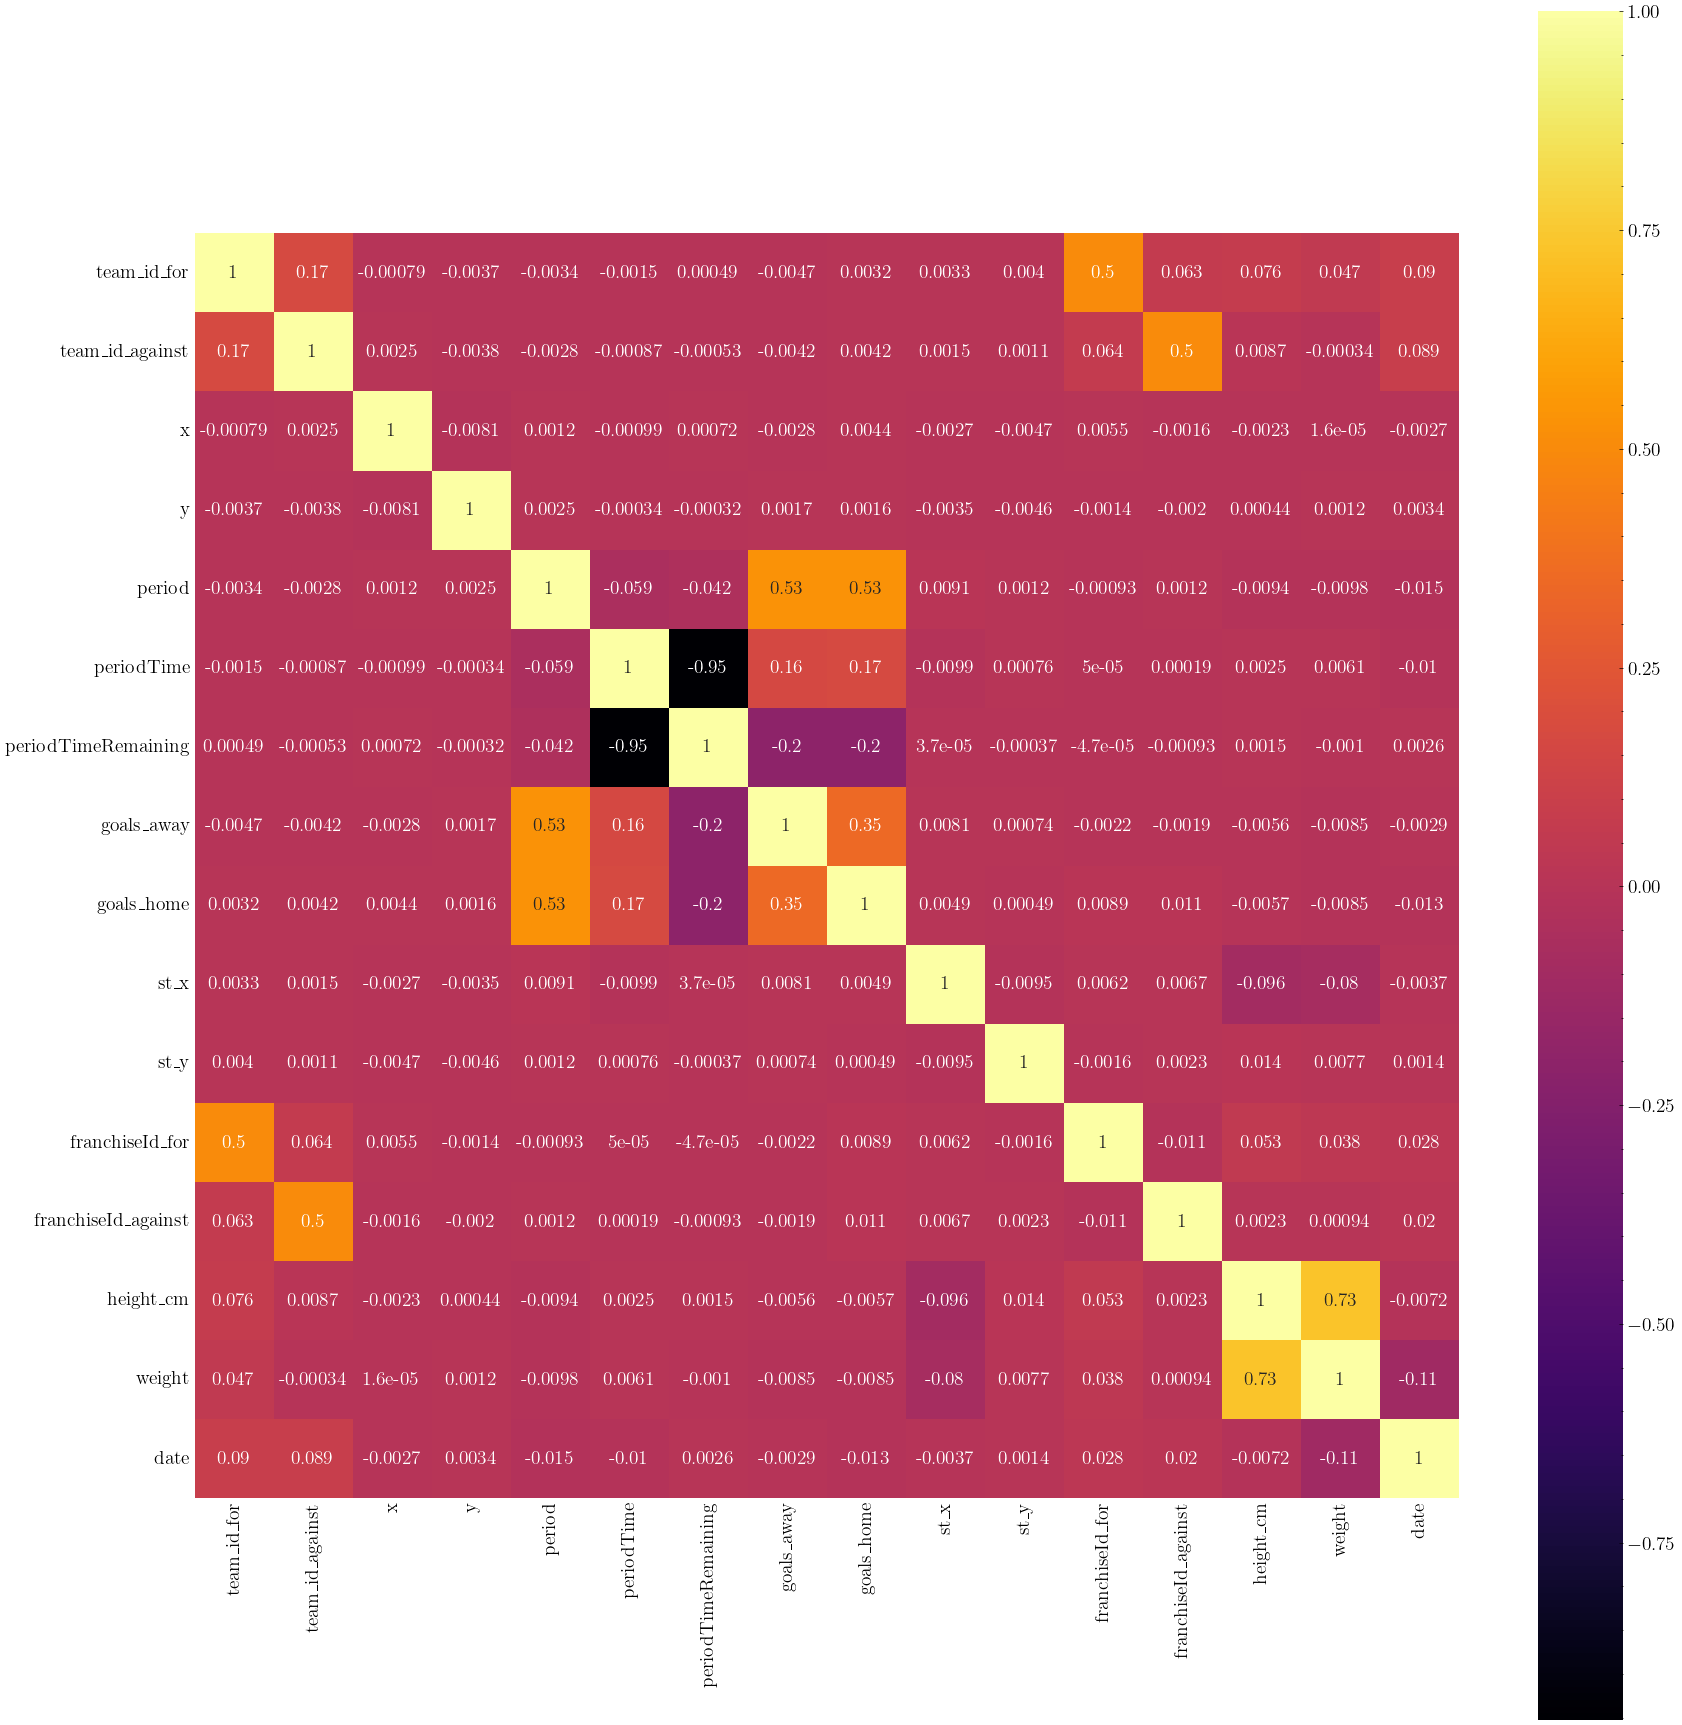

In [29]:
figsize = (18, 18)
fig, ax = plt.subplots(figsize=figsize)

numeric = df_master.select_dtypes(include=[np.number])
correlation = numeric.corr()

heatmap = sns.heatmap(
    correlation,
    annot=True,
    annot_kws={'size': 14},
    cmap='inferno',
    square=True
)

ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()
plt.close()

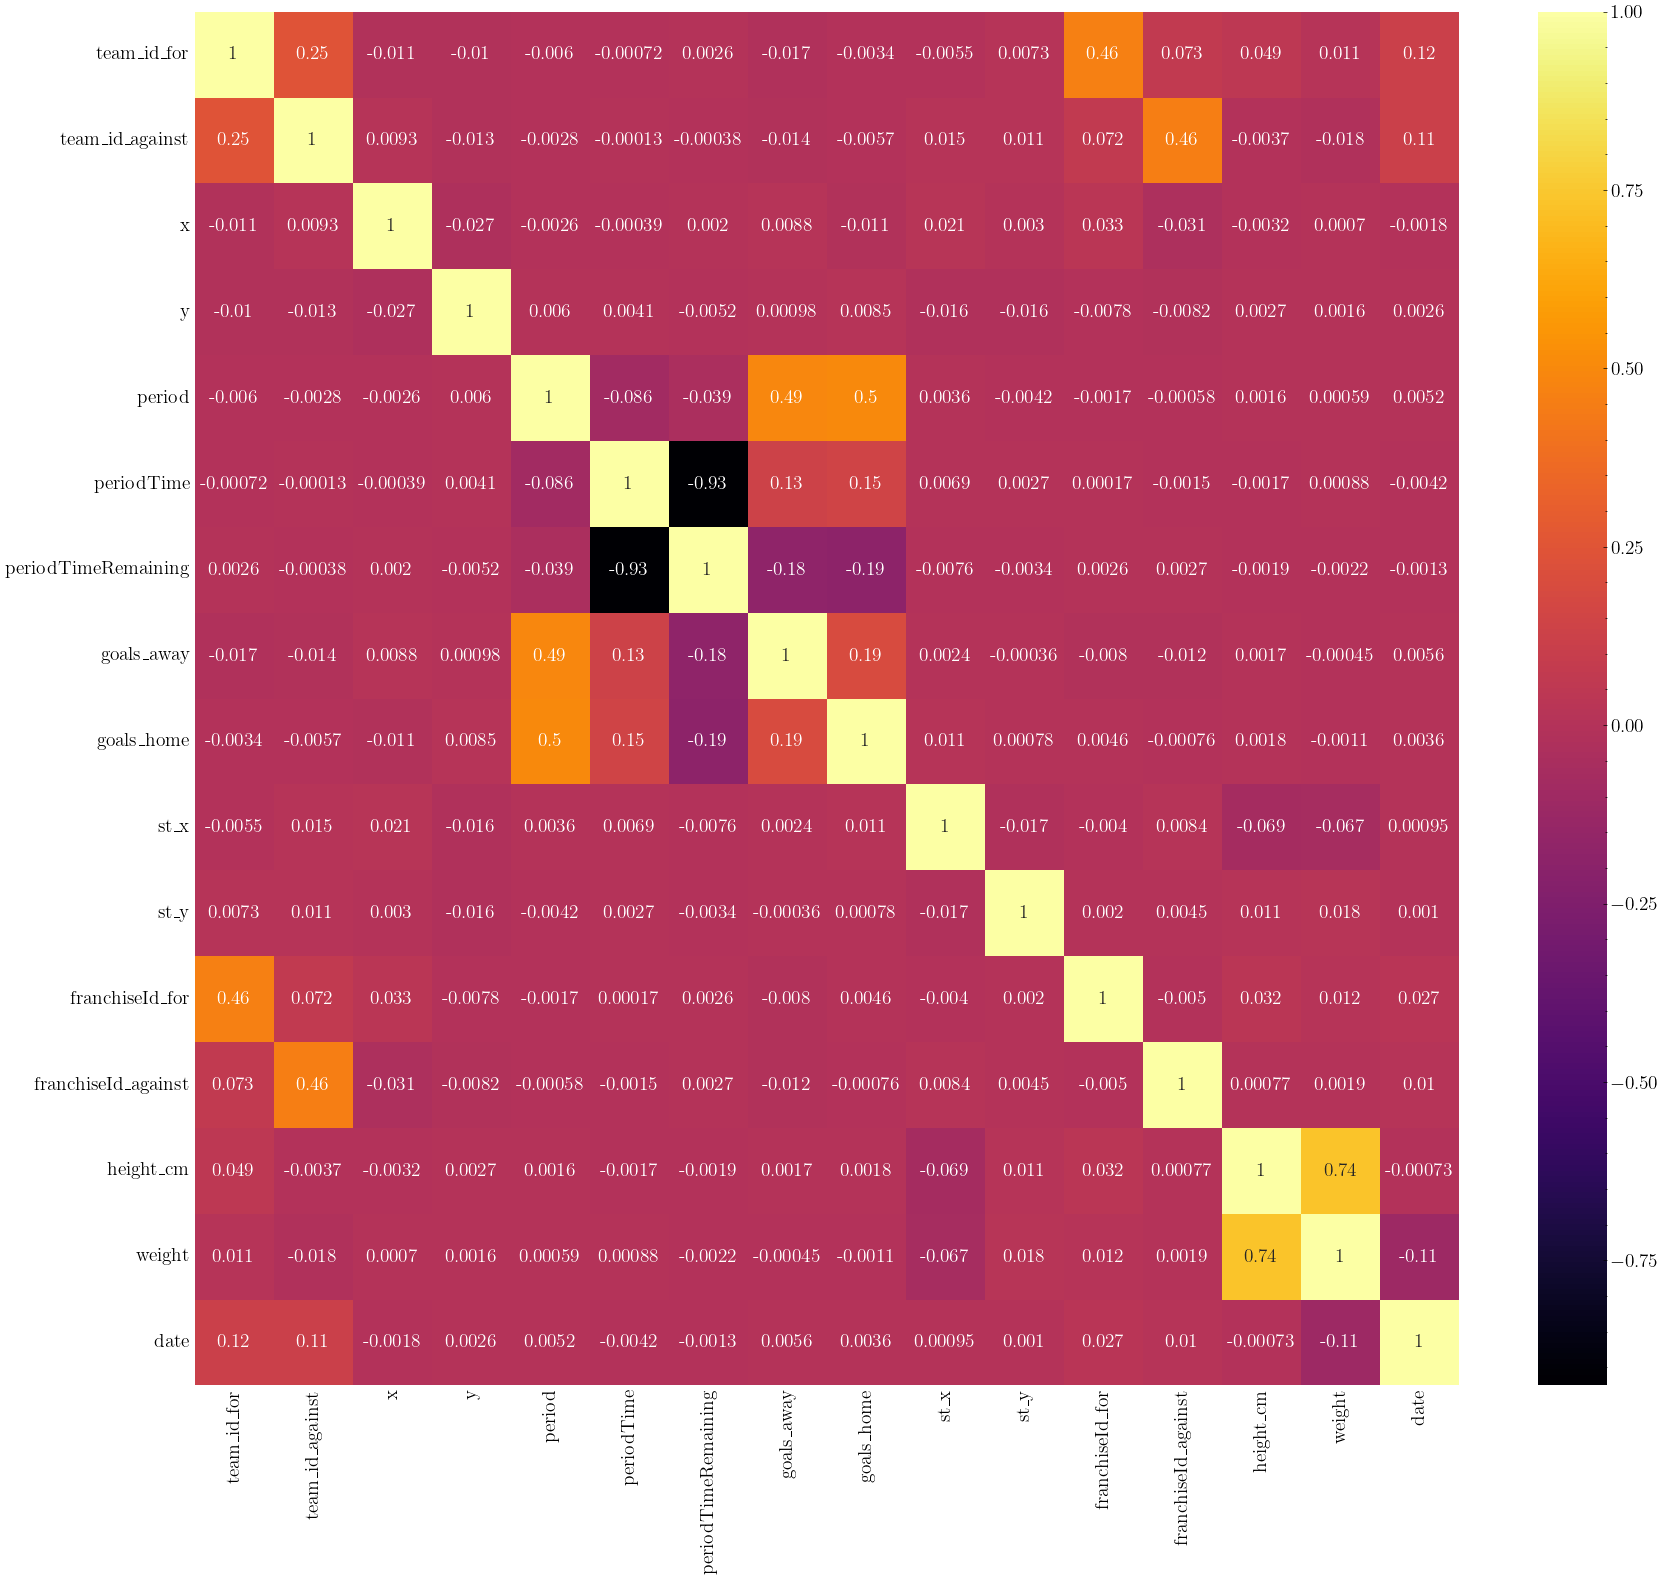

In [30]:
figsize = (18, 16)
fig, ax = plt.subplots(figsize=figsize)

numeric = dataframe.select_dtypes(include=[np.number])
correlation = numeric.corr()

heatmap = sns.heatmap(
    correlation,
    annot=True,
    annot_kws={'size': 14},
    cmap='inferno',
    square=False
)

ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()
plt.close()

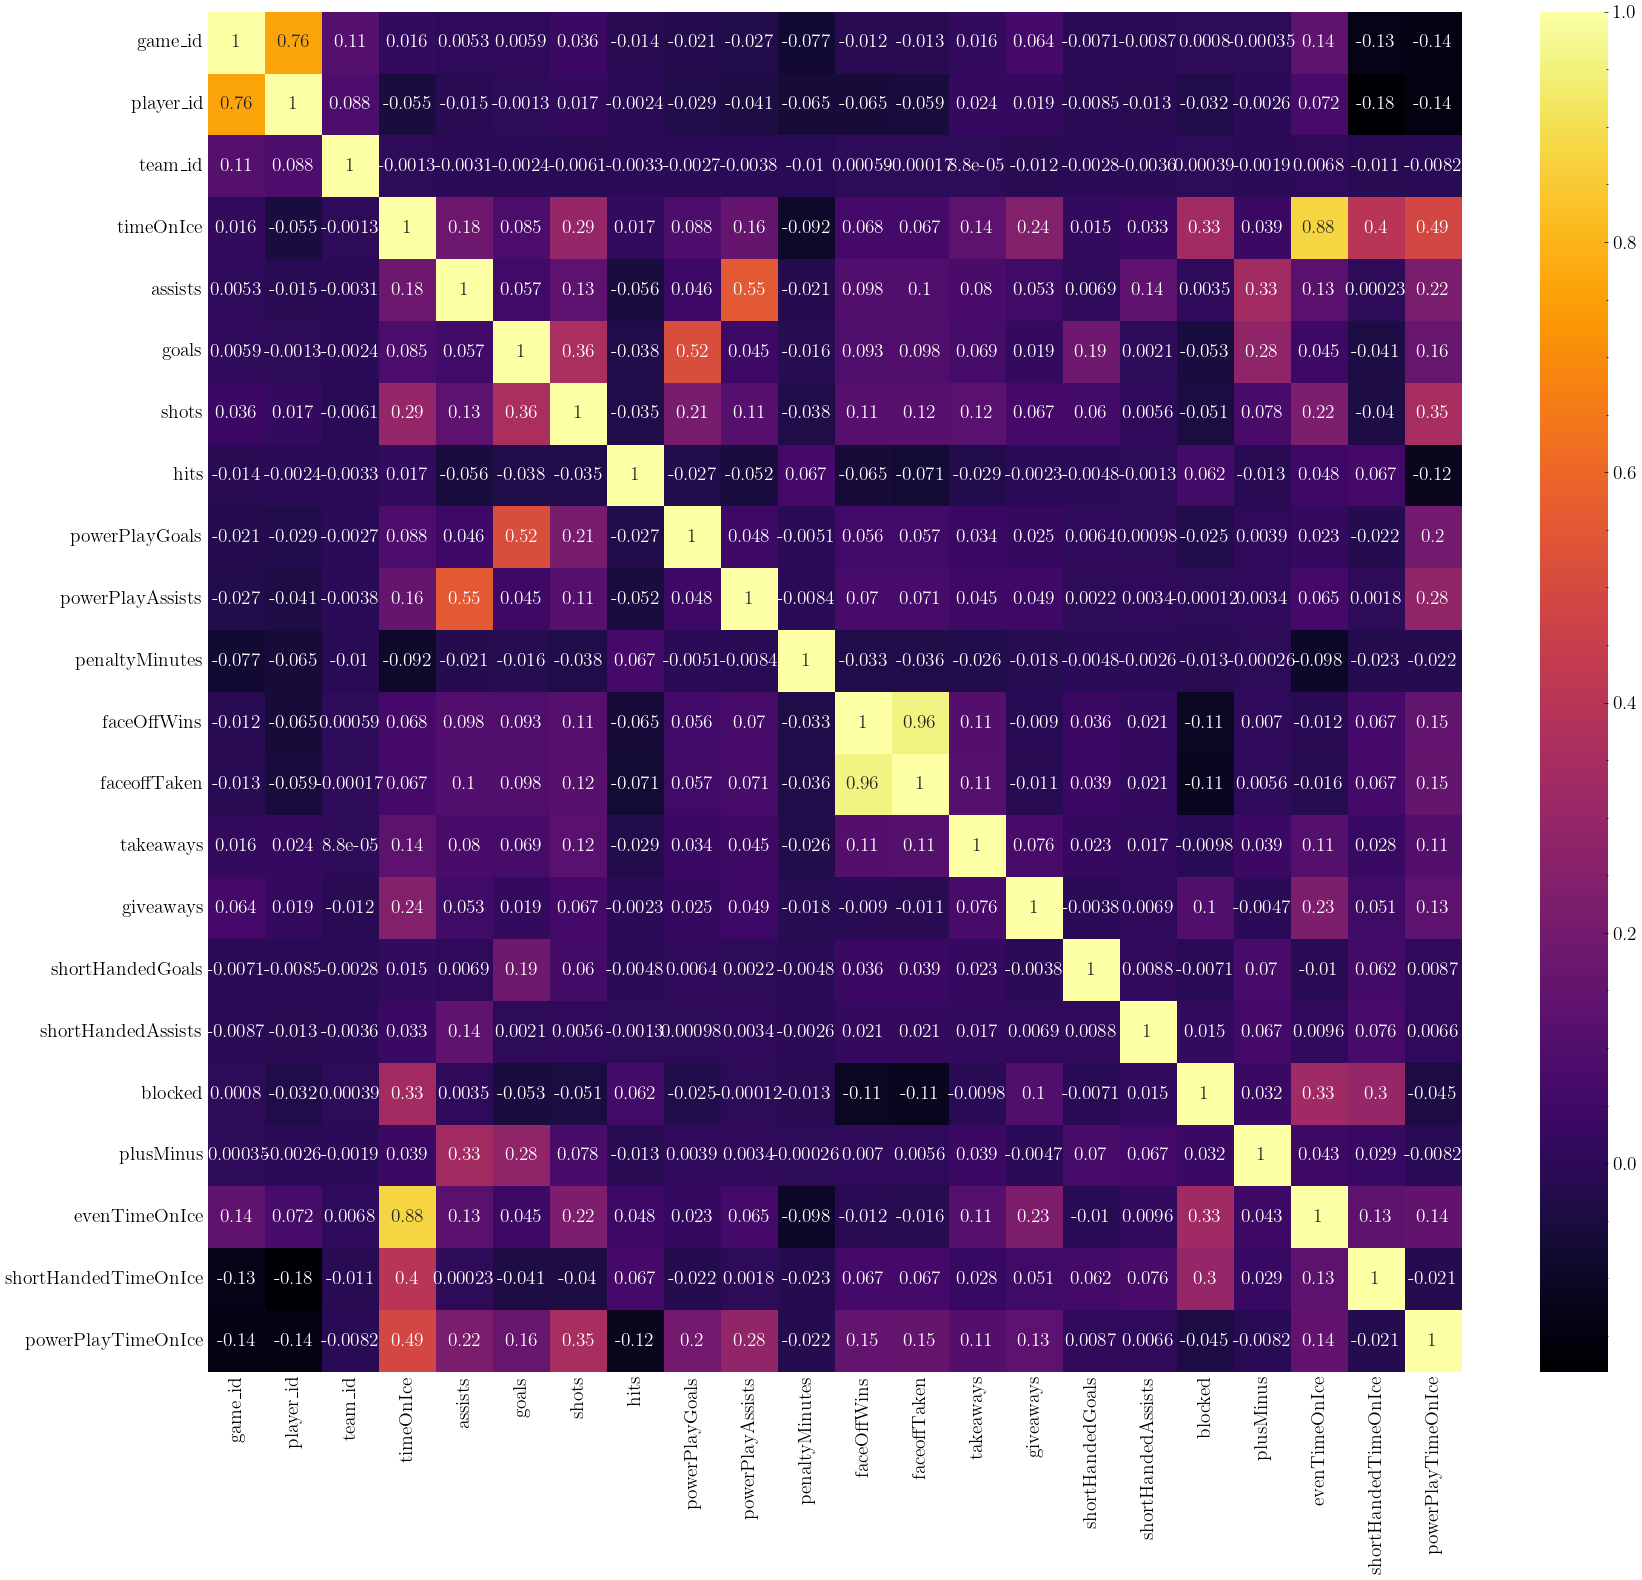

In [31]:
figsize = (18, 16)
fig, ax = plt.subplots(figsize=figsize)

correlation = df_skater.corr()

heatmap = sns.heatmap(
    correlation,
    annot=True,
    annot_kws={'size': 14},
    cmap='inferno',
    square=False
)

ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()
plt.close()

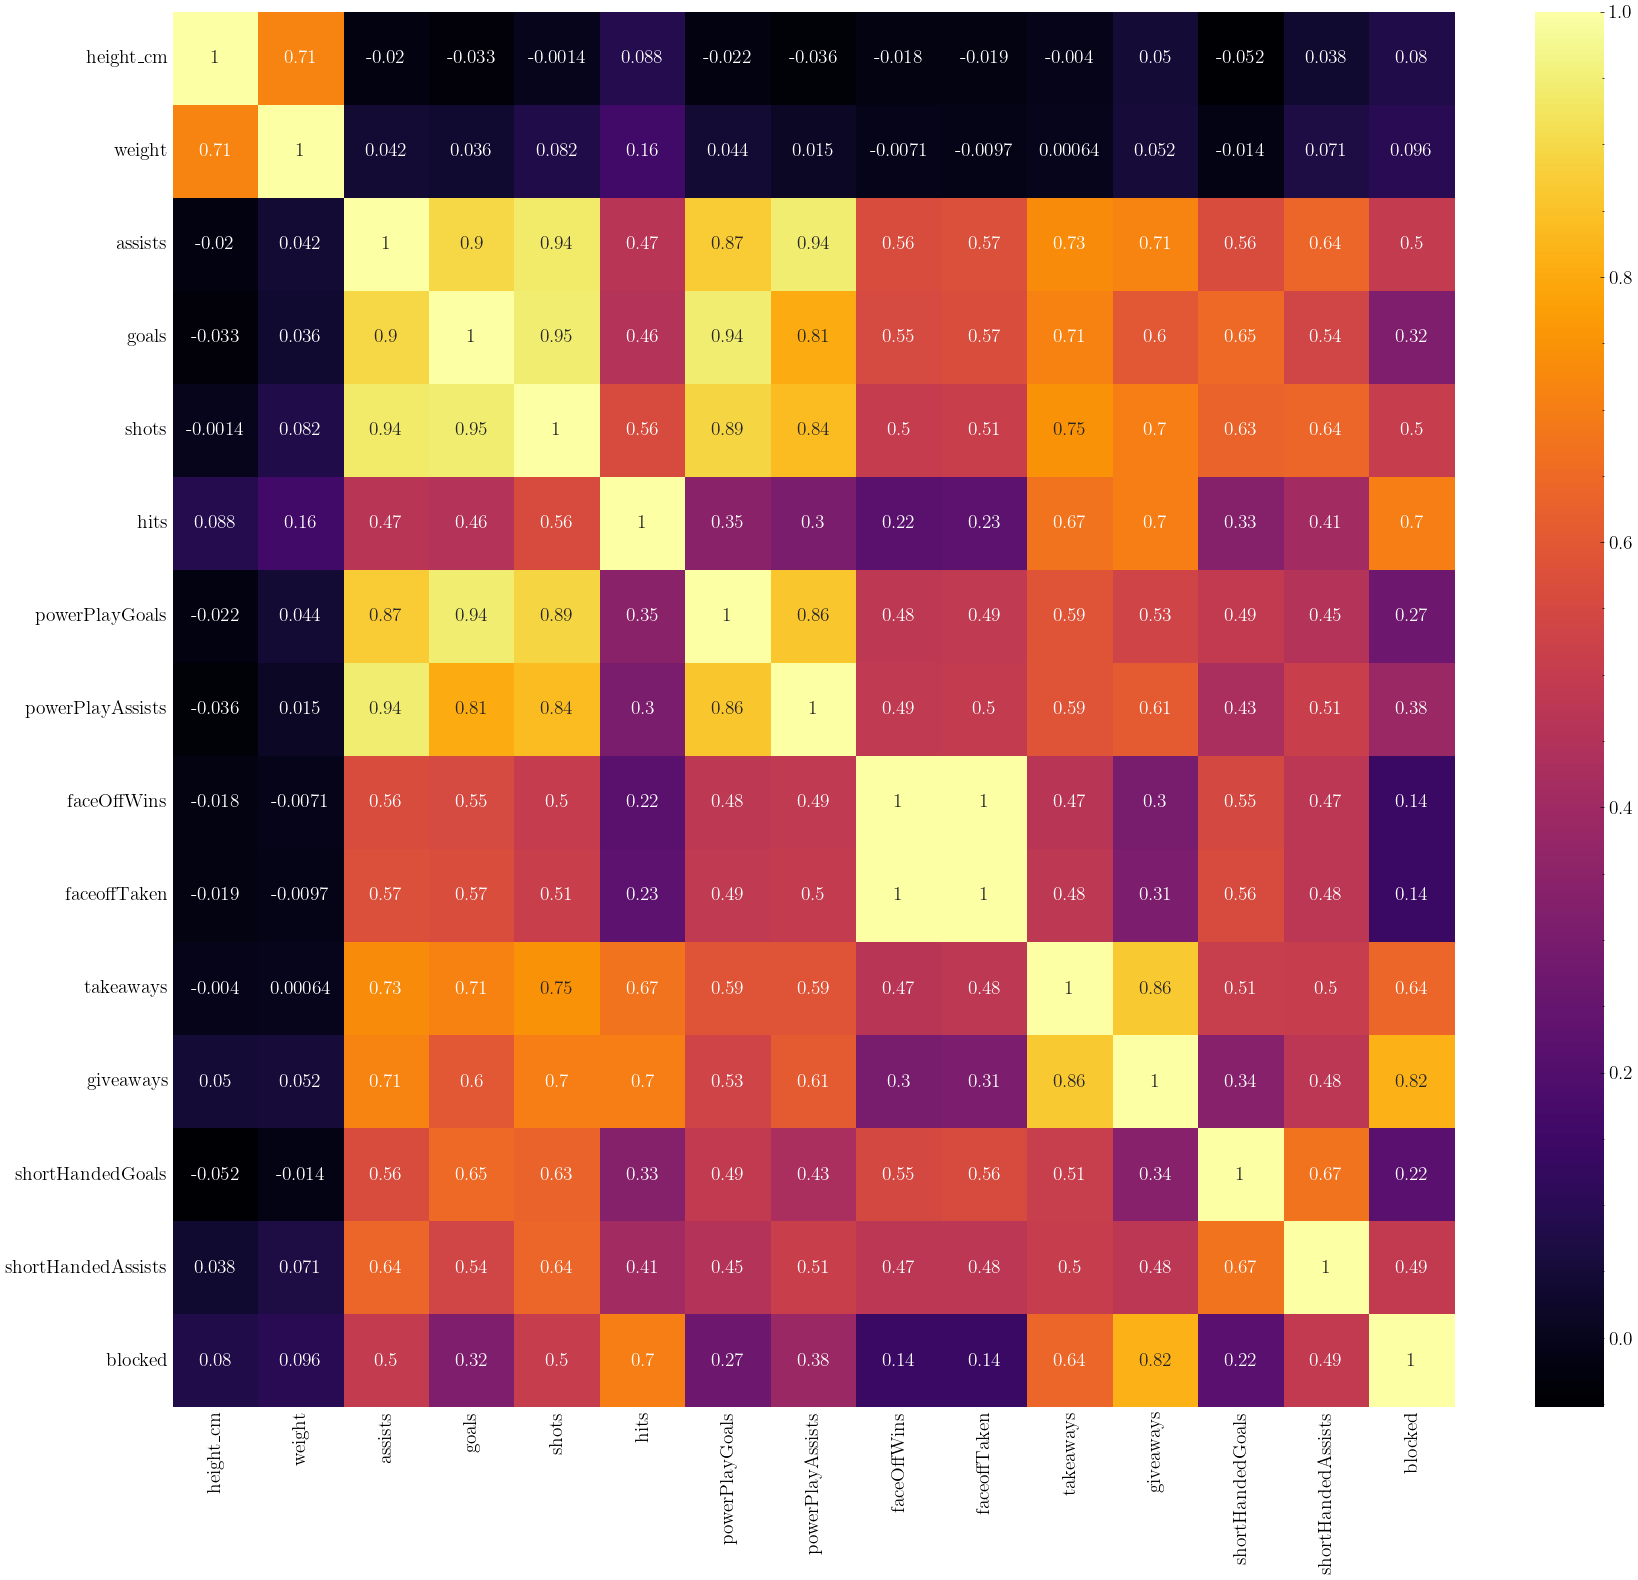

In [32]:
figsize = (18, 16)
fig, ax = plt.subplots(figsize=figsize)

numeric = df_statistics.select_dtypes(include=[np.number])
correlation = numeric.corr()

heatmap = sns.heatmap(
    correlation,
    annot=True,
    annot_kws={'size': 14},
    cmap='inferno',
    square=False
)

ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()
plt.close()

In [33]:
selection = [
    'assists',
    'goals',
    'shots',
    'hits',
    'powerPlayGoals',
    'powerPlayAssists',
    'faceOffWins',
    'faceoffTaken',
    'takeaways',
    'giveaways',
    'shortHandedGoals',
    'shortHandedAssists',
    'blocked',
]

corr = df_statistics[selection].corr()
corr

assists     goals     shots      hits  powerPlayGoals  \
assists             1.000000  0.896566  0.935933  0.466107        0.870814   
goals               0.896566  1.000000  0.946469  0.455676        0.944075   
shots               0.935933  0.946469  1.000000  0.557576        0.891384   
hits                0.466107  0.455676  0.557576  1.000000        0.345988   
powerPlayGoals      0.870814  0.944075  0.891384  0.345988        1.000000   
powerPlayAssists    0.943816  0.806408  0.838877  0.302902        0.858307   
faceOffWins         0.562067  0.554865  0.502202  0.221566        0.480543   
faceoffTaken        0.572652  0.566614  0.512899  0.226601        0.489593   
takeaways           0.729852  0.709347  0.745746  0.672154        0.585573   
giveaways           0.714608  0.597201  0.703963  0.703601        0.533525   
shortHandedGoals    0.561198  0.647301  0.630522  0.331011        0.494059   
shortHandedAssists  0.639568  0.539227  0.640748  0.406625        0.454402   
blocked             0.498437  0.315104  0.502671  0.700114        0.269193   

                    powerPlayAssists  faceOffWins  faceoffTaken  takeaways  \
assists                     0.943816     0.562067      0.572652   0.729852   
goals                       0.806408     0.554865      0.566614   0.709347   
shots                       0.838877     0.502202      0.512899   0.745746   
hits                        0.302902     0.221566      0.226601   0.672154   
powerPlayGoals              0.858307     0.480543      0.489593   0.585573   
powerPlayAssists            1.000000     0.488230      0.496851   0.586623   
faceOffWins                 0.488230     1.000000      0.997666   0.469241   
faceoffTaken                0.496851     0.997666      1.000000   0.478821   
takeaways                   0.586623     0.469241      0.478821   1.000000   
giveaways                   0.606498     0.297367      0.305540   0.864476   
shortHandedGoals            0.428848     0.549278      0.557204   0.507074   
shortHandedAssists          0.510967     0.474883      0.475476   0.504855   
blocked                     0.384846     0.138311      0.139521   0.639685   

                    giveaways  shortHandedGoals  shortHandedAssists   blocked  
assists              0.714608          0.561198            0.639568  0.498437  
goals                0.597201          0.647301            0.539227  0.315104  
shots                0.703963          0.630522            0.640748  0.502671  
hits                 0.703601          0.331011            0.406625  0.700114  
powerPlayGoals       0.533525          0.494059            0.454402  0.269193  
powerPlayAssists     0.606498          0.428848            0.510967  0.384846  
faceOffWins          0.297367          0.549278            0.474883  0.138311  
faceoffTaken         0.305540          0.557204            0.475476  0.139521  
takeaways            0.864476          0.507074            0.504855  0.639685  
giveaways            1.000000          0.337457            0.475096  0.818507  
shortHandedGoals     0.337457          1.000000            0.673882  0.215154  
shortHandedAssists   0.475096          0.673882            1.000000  0.490739  
blocked              0.818507          0.215154            0.490739  1.000000

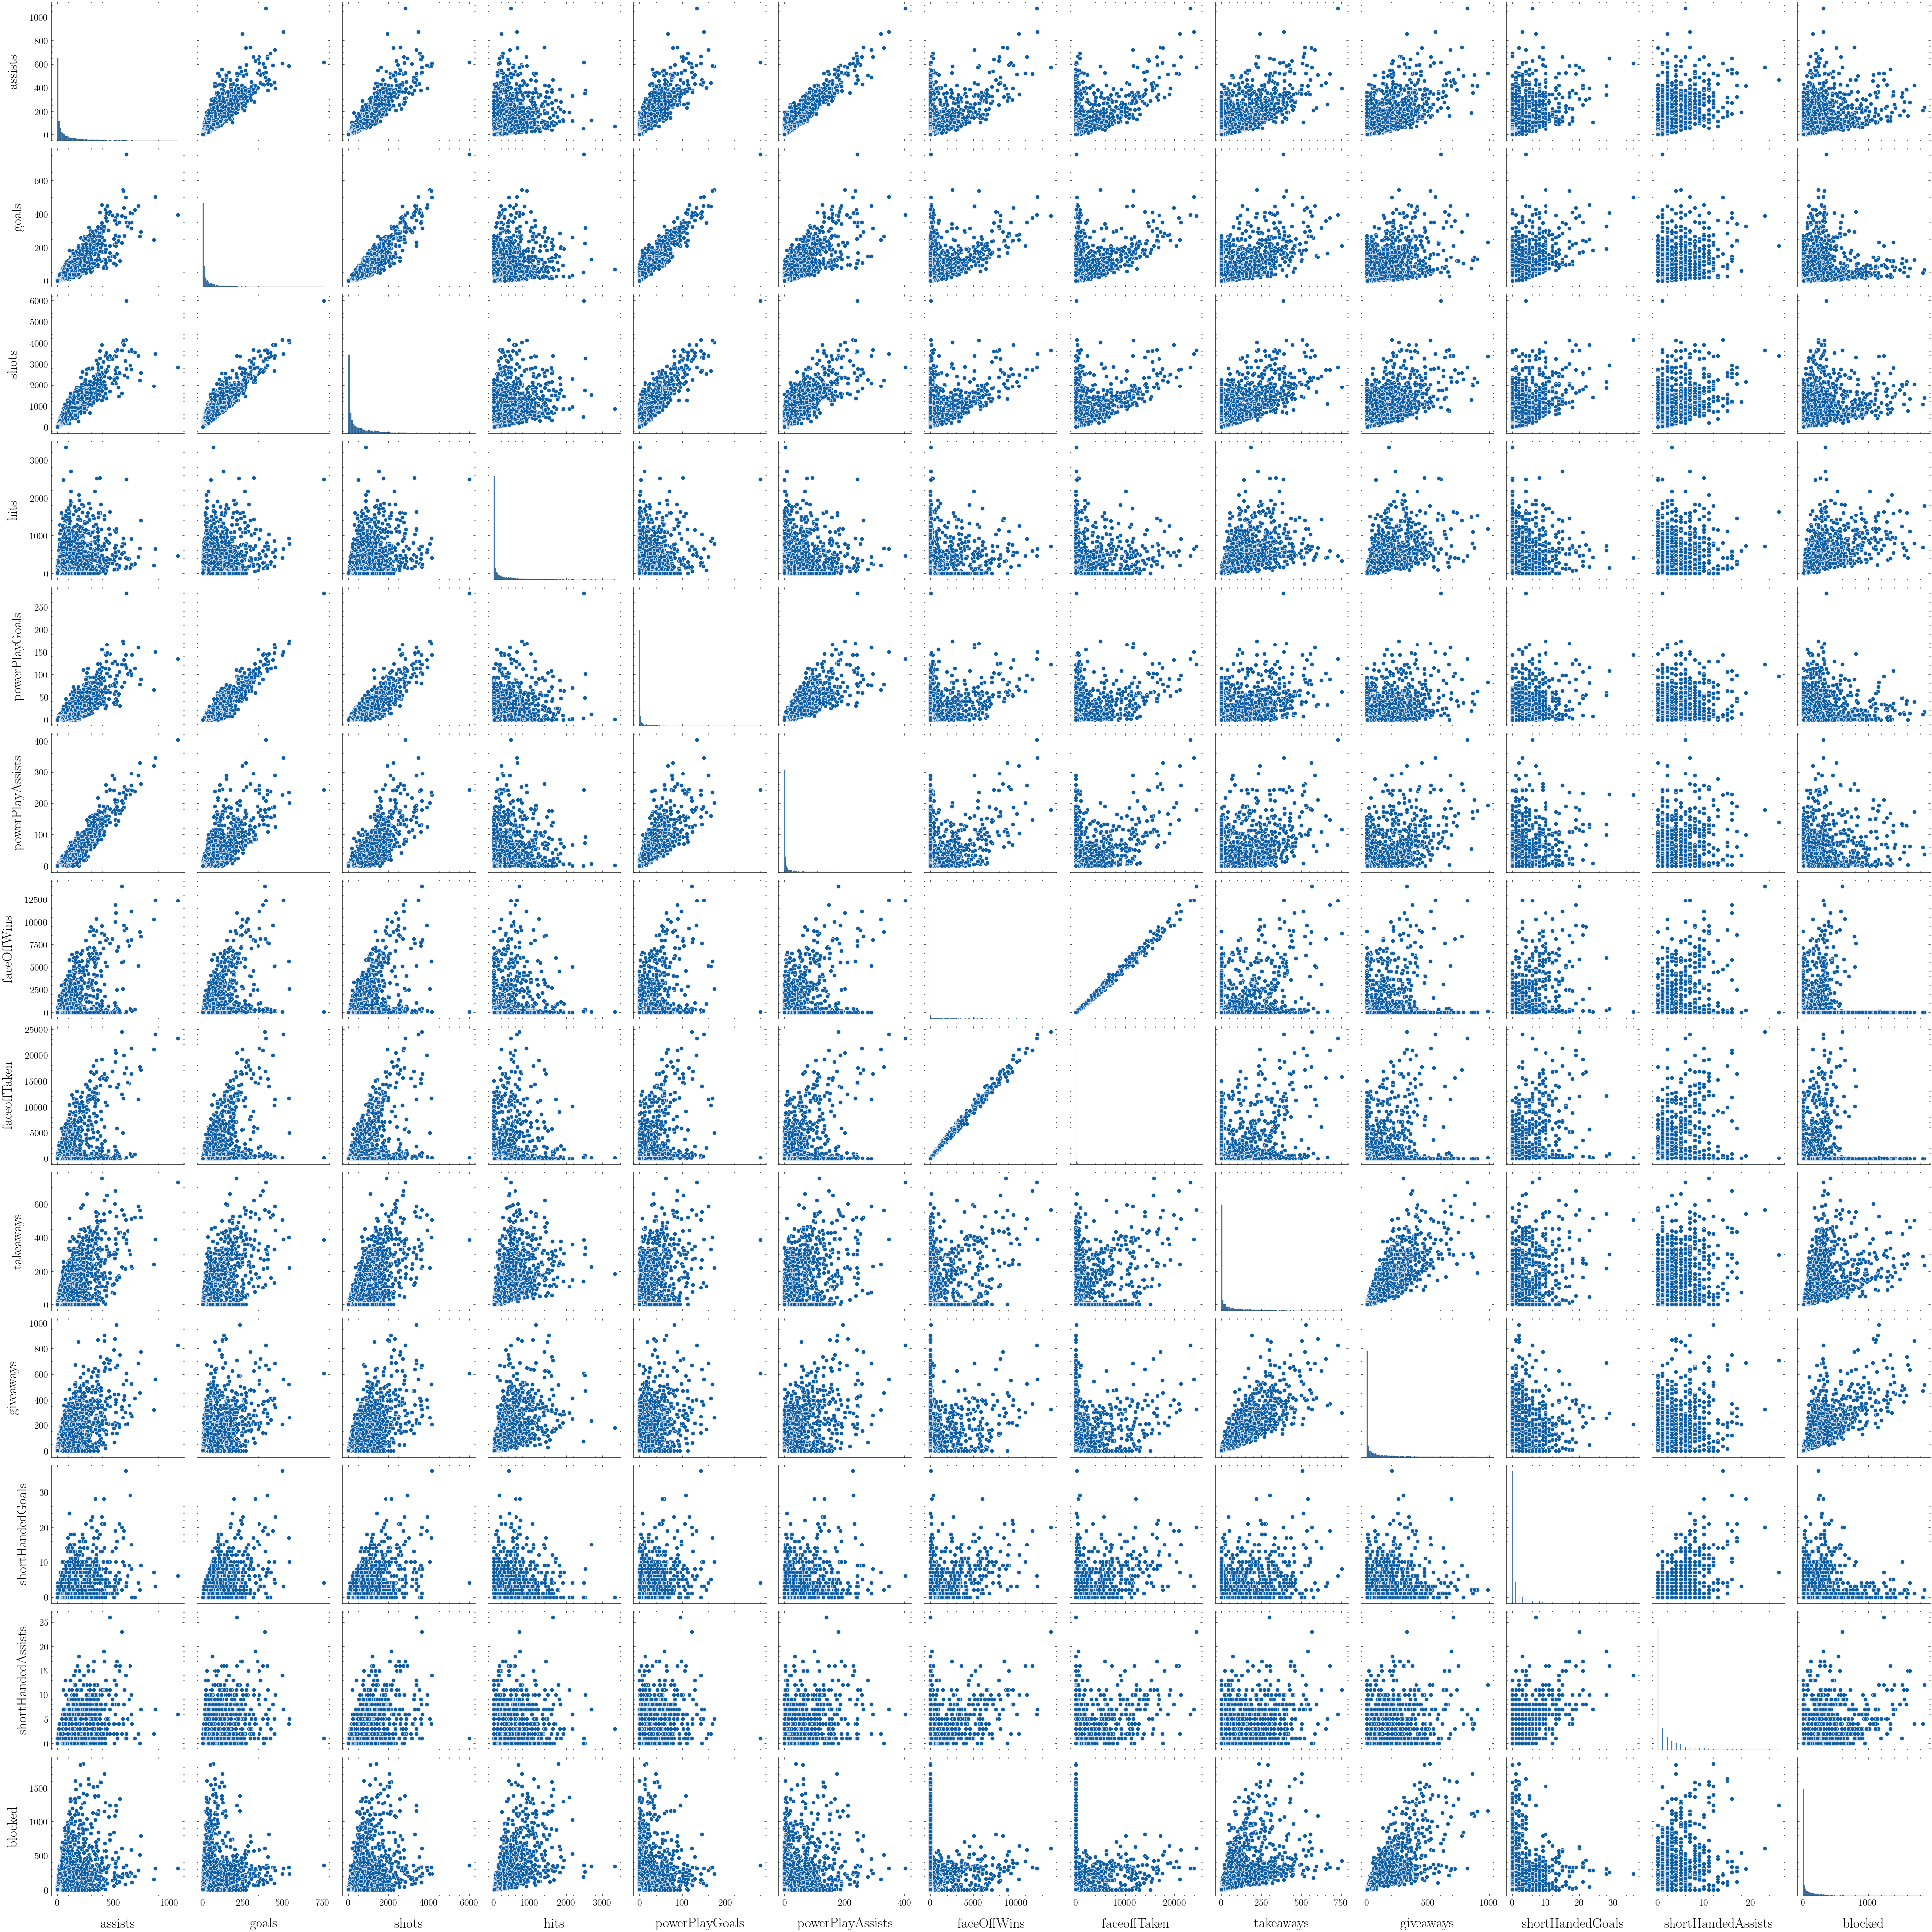

In [34]:
selection = [
    'assists',
    'goals',
    'shots',
    'hits',
    'powerPlayGoals',
    'powerPlayAssists',
    'faceOffWins',
    'faceoffTaken',
    'takeaways',
    'giveaways',
    'shortHandedGoals',
    'shortHandedAssists',
    'blocked',
]

corr = df_statistics[selection]
sns.pairplot(corr, height=3)

plt.tight_layout()
plt.show()
plt.close()

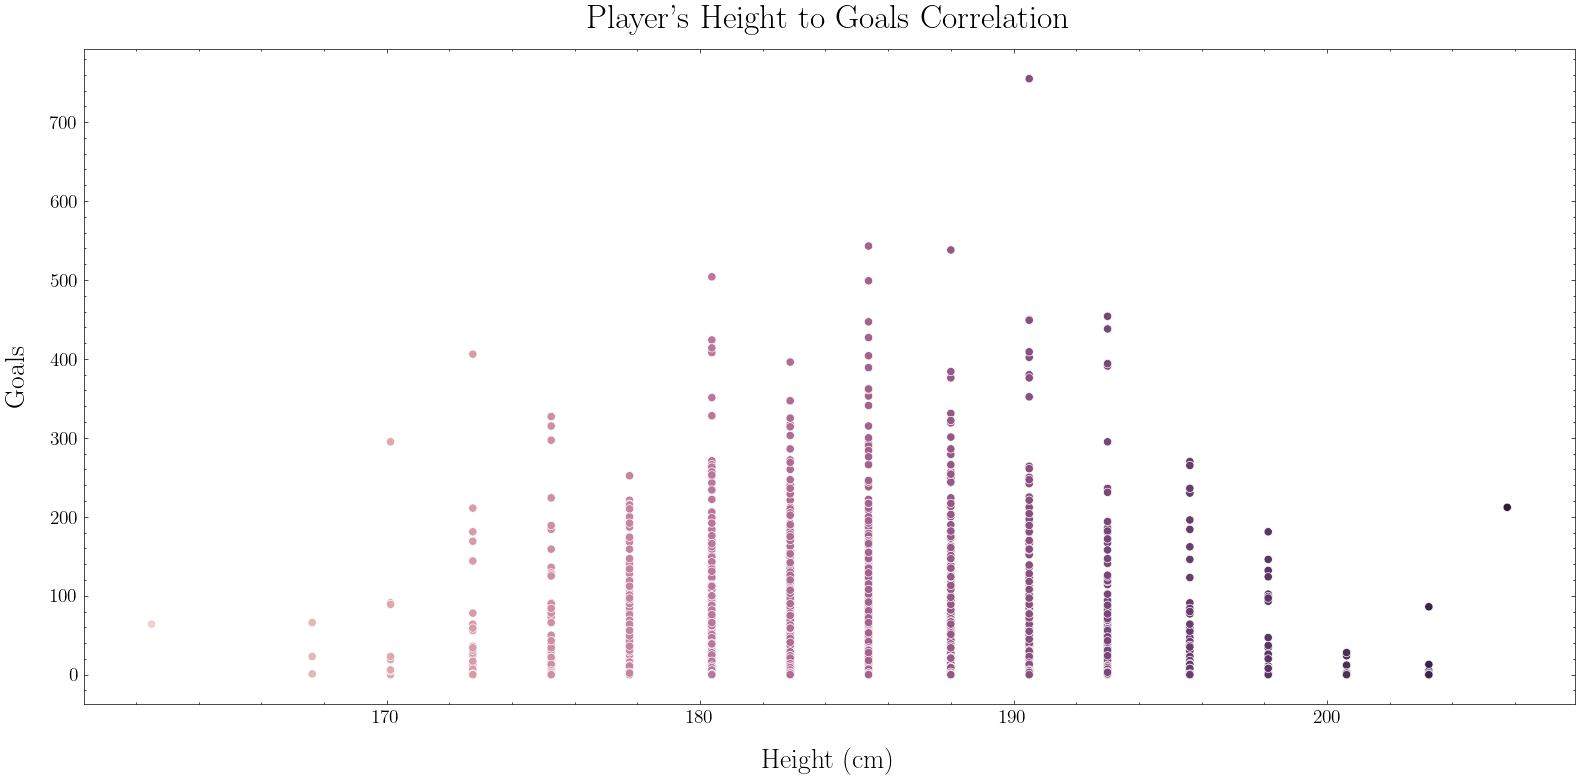

In [35]:
figsize = (16, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=df_statistics, 
    x='height_cm', 
    y='goals',
    hue='height_cm',
    legend=False
)

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Goals')

ax.set_title('Player\'s Height to Goals Correlation')

plt.tight_layout()
plt.show()
plt.close()

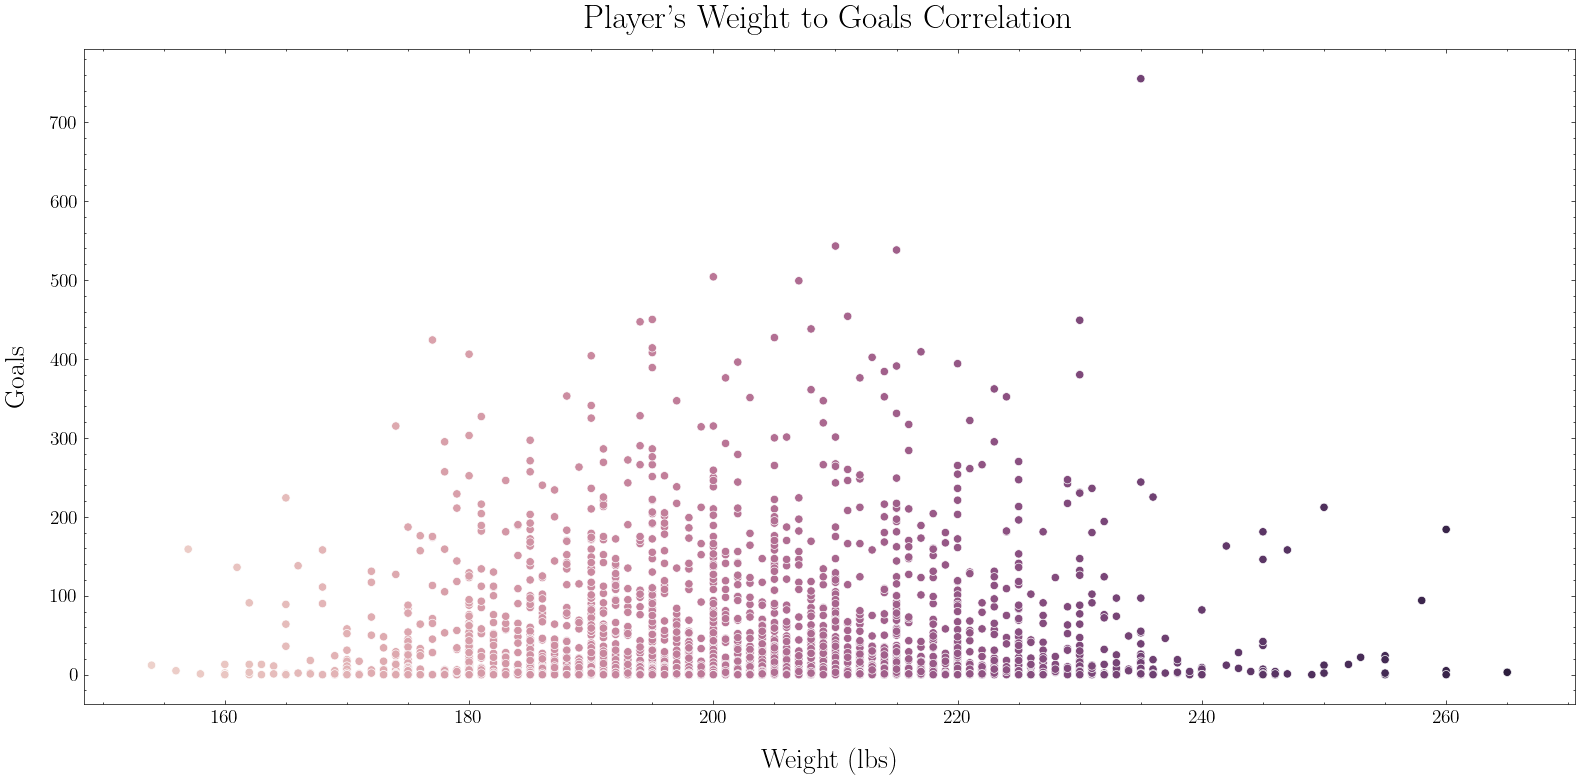

In [36]:
figsize = (16, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=df_statistics, 
    x='weight', 
    y='goals',
    hue='weight',
    legend=False
)

ax.set_xlabel('Weight (lbs)')
ax.set_ylabel('Goals')

ax.set_title('Player\'s Weight to Goals Correlation')

plt.tight_layout()
plt.show()
plt.close()

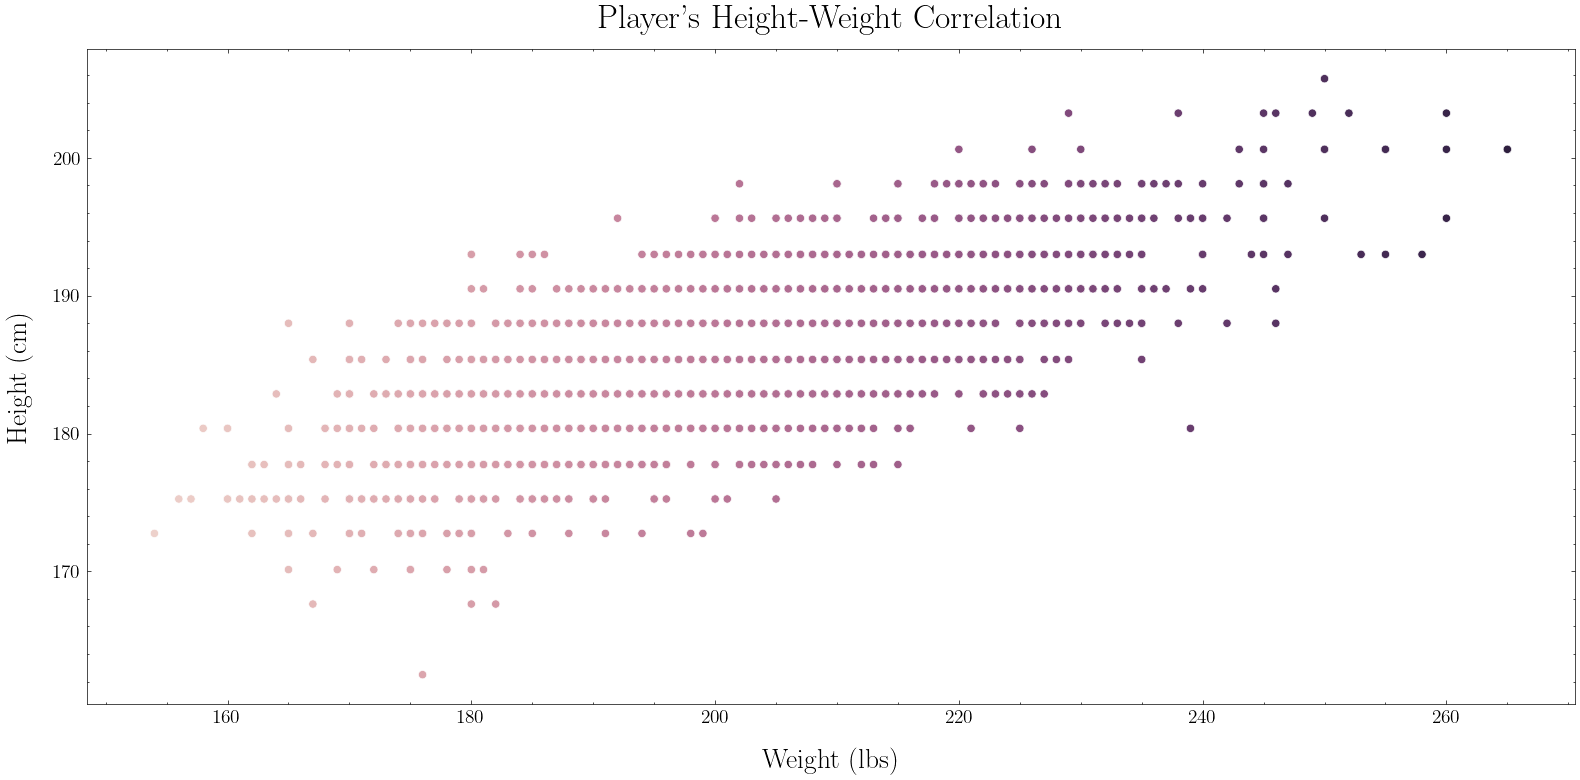

In [37]:
figsize = (16, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=df_statistics, 
    x='weight', 
    y='height_cm',
    hue='weight',
    legend=False
)

ax.set_xlabel('Weight (lbs)')
ax.set_ylabel('Height (cm)')

ax.set_title('Player\'s Height-Weight Correlation')

plt.tight_layout()
plt.show()
plt.close()

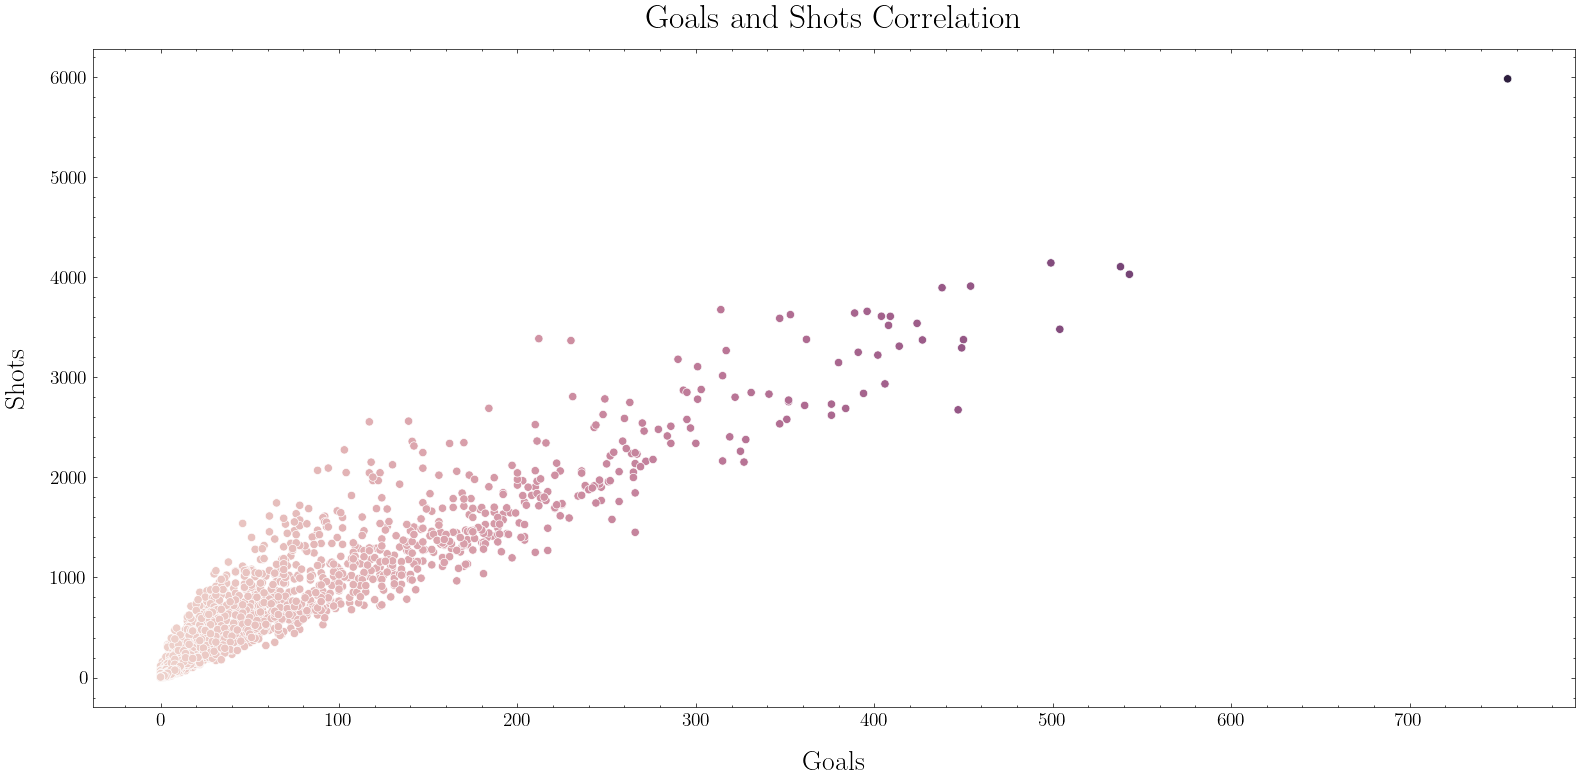

In [38]:
figsize = (16, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=df_statistics, 
    x='goals', 
    y='shots',
    hue='goals',
    legend=False
)

ax.set_xlabel('Goals')
ax.set_ylabel('Shots')

ax.set_title('Goals and Shots Correlation')

plt.tight_layout()
plt.show()
plt.close()

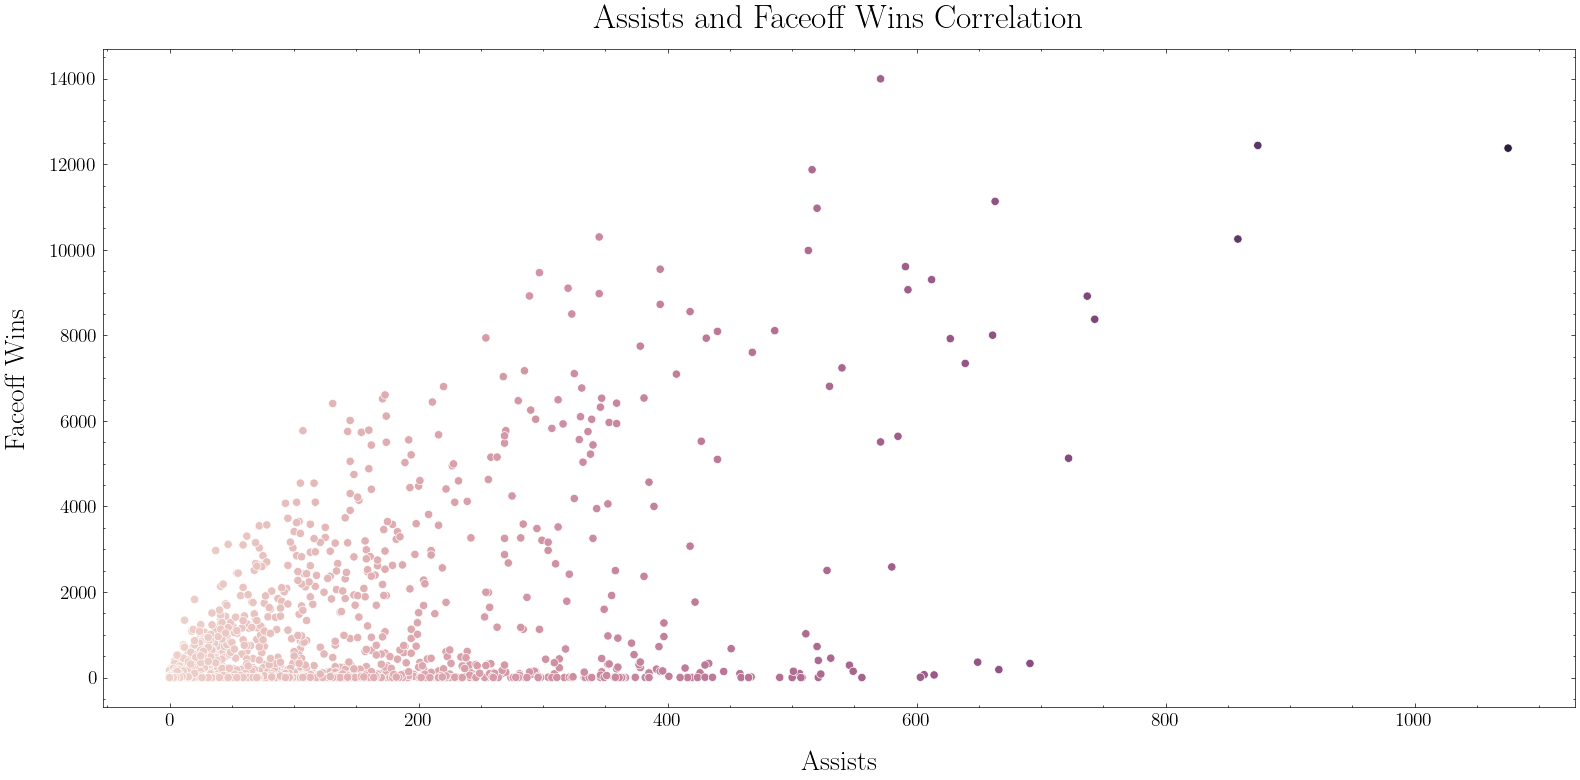

In [39]:
figsize = (16, 8)
fig, ax = plt.subplots(figsize=figsize)

sns.scatterplot(
    data=df_statistics, 
    x='assists', 
    y='faceOffWins',
    hue='assists',
    legend=False
)

ax.set_xlabel('Assists')
ax.set_ylabel('Faceoff Wins')

ax.set_title('Assists and Faceoff Wins Correlation')

plt.tight_layout()
plt.show()
plt.close()

Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.


1.   **Goals and Shots**

    - Magnitude: 0.946469

    - Direction: Highly Positive Correlation

    - Description: The most obvious and unsurprising correlation is between shots and goals. The more shots on net, the more goals. The less shots on net, the less goals.


2.   **Faceoff Wins and Assists**

    - Magnitude: 0.562067

    - Direction: Moderately Positive Correlation

    - Description: One of the most surprising correlations was that of faceoff wins and assists. I was under the assumption that more faceoff wins would result in far more assists, however this does not appear to be the case. A faceoff win does not seem to improve the player's statistics by getting an assist. This relationship makes sense, because hockey is a fast-paced game, the puck is always changing possession, and depending on where the faceoff is at on the ice, it will impact the player's ability to get an assist.



$$\text{\Huge{Discussion}}$$

Did this exploritory data analysis help you better understand your chosen dataset? If so how? Is there still parts that don't make sense?

> The idea with this question is not to see if you know everything about this dataset, just how EDA might have helped (or not!).


1.   EDA helped me understand the data. The process of cleaning and sorting the data helped me identify *how* each .csv file was connected and aided me in brainstorming how I was going to visualize the data.
2.   The process of visualizing and plotting the data kept spawning new ideas, which resulted in the production of more plots.
3.   The most frustrating part was figuring out the correct syntax and correct method of data cleaning. However, I am starting to get more comfortable with it and feel confident about working with new data in the future.
4.   I am still uncertain and uncomfortable on how to handle missing data properly. I fear that I could be misrepresenting some of the data, because of how I handled duplicate/missing data. The NHL API is not as clean as I would have hoped, as there were duplicates row and missing data everywhere, and there was no explanation as to *why* this was. As a result, it made me uneasy about some of the results.

